In [4]:
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt 
import seaborn as sns
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [5]:
data=pd.read_csv('Leads.csv')
data

Prospect ID  Lead Number  \
0     7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737   
1     2a272436-5132-4136-86fa-dcc88c88f482       660728   
2     8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727   
3     0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719   
4     3256f628-e534-4826-9d63-4a8b88782852       660681   
...                                    ...          ...   
9235  19d6451e-fcd6-407c-b83b-48e1af805ea9       579564   
9236  82a7005b-7196-4d56-95ce-a79f937a158d       579546   
9237  aac550fe-a586-452d-8d3c-f1b62c94e02c       579545   
9238  5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9       579538   
9239  571b5c8e-a5b2-4d57-8574-f2ffb06fdeff       579533   

                  Lead Origin     Lead Source Do Not Email Do Not Call  \
0                         API      Olark Chat           No          No   
1                         API  Organic Search           No          No   
2     Landing Page Submission  Direct Traffic           No          No   
3     Landing Page Submission  Direct Traffic           No          No   
4     Landing Page Submission          Google           No          No   
...                       ...             ...          ...         ...   
9235  Landing Page Submission  Direct Traffic          Yes          No   
9236  Landing Page Submission  Direct Traffic           No          No   
9237  Landing Page Submission  Direct Traffic          Yes          No   
9238  Landing Page Submission          Google           No          No   
9239  Landing Page Submission  Direct Traffic           No          No   

      Converted  TotalVisits  Total Time Spent on Website  \
0             0          0.0                            0   
1             0          5.0                          674   
2             1          2.0                         1532   
3             0          1.0                          305   
4             1          2.0                         1428   
...         ...          ...                          ...   
9235          1          8.0                         1845   
9236          0          2.0                          238   
9237          0          2.0                          199   
9238          1          3.0                          499   
9239          1          6.0                         1279   

      Page Views Per Visit  ... Get updates on DM Content    Lead Profile  \
0                     0.00  ...                        No          Select   
1                     2.50  ...                        No          Select   
2                     2.00  ...                        No  Potential Lead   
3                     1.00  ...                        No          Select   
4                     1.00  ...                        No          Select   
...                    ...  ...                       ...             ...   
9235                  2.67  ...                        No  Potential Lead   
9236                  2.00  ...                        No  Potential Lead   
9237                  2.00  ...                        No  Potential Lead   
9238                  3.00  ...                        No             NaN   
9239                  3.00  ...                        No  Potential Lead   

                    City Asymmetrique Activity Index  \
0                 Select                   02.Medium   
1                 Select                   02.Medium   
2                 Mumbai                   02.Medium   
3                 Mumbai                   02.Medium   
4                 Mumbai                   02.Medium   
...                  ...                         ...   
9235              Mumbai                   02.Medium   
9236              Mumbai                   02.Medium   
9237              Mumbai                   02.Medium   
9238  Other Metro Cities                   02.Medium   
9239        Other Cities                   02.Medium   

     Asymmetrique Profile Index Asymmetrique Activity Score  \
0                     02.Medium        

In [6]:
data.shape

(9240, 37)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [8]:
data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

From above description about counts, we can see that there are missing values present in our data.

### Data Cleaning

Many of the categorical variables: Specialization, How did you hear about X Education.. have a level called 'Select' which needs to be handled because it is as good as a null value

In [9]:
# Converting 'Select' values to NaN.
data = data.replace('Select', np.nan)

In [10]:
round(data.isnull().sum()/data.shape[0],2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
How did you hear about X Education               78.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

can drop the columns with missing values greater than 40% .

In [11]:
data=data.drop(columns=['How did you hear about X Education','Lead Quality','Lead Profile',
                                  'Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score',
                                 'Asymmetrique Profile Score'])

In [12]:
data.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Digital Advertisement Through Recommendations  \
0                    No                      No   
1                    No                      No   
2                    No                      No   
3                    No                      No   
4                    No                      No   

  Receive More Updates About Our Courses                                 Tags  \
0                                     No          Interested in other courses   
1                                     No                              Ringing   
2                                     No  Will revert after reading the email   
3                                     No                              Ringing   
4                                     No  Will revert after reading the email   

  Update me on Supply Chain Content Get updates on DM Content    City  \
0                                No                        No     NaN   
1                                No                        No     NaN   
2                                No                        No  Mumbai   
3                                No                        No  Mumbai   
4                                No                        No  Mumbai   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 30 columns]

### Data Preparation Imputing missing values

In [13]:
#check null value percentage again
round(data.isnull().sum()/data.shape[0],2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums          

Lets change the Traget variable converted to 'Yes' and 'no' for comprehensive

In [14]:
category={0:"No", 1:"Yes"} 
data['Converted']=data['Converted'].map(category)
data.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call Converted  TotalVisits  \
0      Olark Chat           No          No        No          0.0   
1  Organic Search           No          No        No          5.0   
2  Direct Traffic           No          No       Yes          2.0   
3  Direct Traffic           No          No        No          1.0   
4          Google           No          No       Yes          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Digital Advertisement Through Recommendations  \
0                    No                      No   
1                    No                      No   
2                    No                      No   
3                    No                      No   
4                    No                      No   

  Receive More Updates About Our Courses                                 Tags  \
0                                     No          Interested in other courses   
1                                     No                              Ringing   
2                                     No  Will revert after reading the email   
3                                     No                              Ringing   
4                                     No  Will revert after reading the email   

  Update me on Supply Chain Content Get updates on DM Content    City  \
0                                No                        No     NaN   
1                                No                        No     NaN   
2                                No                        No  Mumbai   
3                                No                        No  Mumbai   
4                                No                        No  Mumbai   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 30 columns]

Lets check categorical parameters data where missing/unncessary data can be replaced. 

In [15]:
# Lets check country categories percentage which has 27% missing values
round(data['Country'].value_counts(normalize=True),2)*100

India                   96.0
United States            1.0
United Arab Emirates     1.0
Singapore                0.0
Saudi Arabia             0.0
United Kingdom           0.0
Australia                0.0
Qatar                    0.0
Hong Kong                0.0
Bahrain                  0.0
Oman                     0.0
France                   0.0
unknown                  0.0
South Africa             0.0
Nigeria                  0.0
Germany                  0.0
Kuwait                   0.0
Canada                   0.0
Sweden                   0.0
China                    0.0
Asia/Pacific Region      0.0
Uganda                   0.0
Bangladesh               0.0
Italy                    0.0
Belgium                  0.0
Netherlands              0.0
Ghana                    0.0
Philippines              0.0
Russia                   0.0
Switzerland              0.0
Vietnam                  0.0
Denmark                  0.0
Tanzania                 0.0
Liberia                  0.0
Malaysia      

We can see that this is highly skewed column but it is an important information w.r.t. to the lead. Since most values are 'India' , we can impute missing values in this column with this value.

In [16]:
cat_param= ['Country','Specialization','What is your current occupation','What matters most to you in choosing a course','Tags','City']

In [17]:
def categorical_plot(var):
    plt.figure(figsize=(40,20))
    
    plt.rcParams['axes.labelpad'] = 40
    plt.subplot(3, 2, 2)
    sns.countplot(x=var, data=data, palette = 'Set3') 
    plt.xlabel(var, fontsize= 16, fontweight="bold")                                                        
    plt.ylabel('count', fontsize= 16, fontweight="bold")
    plt.xticks(rotation=90, fontsize=14)
    plt.yticks(rotation=360, fontsize=14)
    

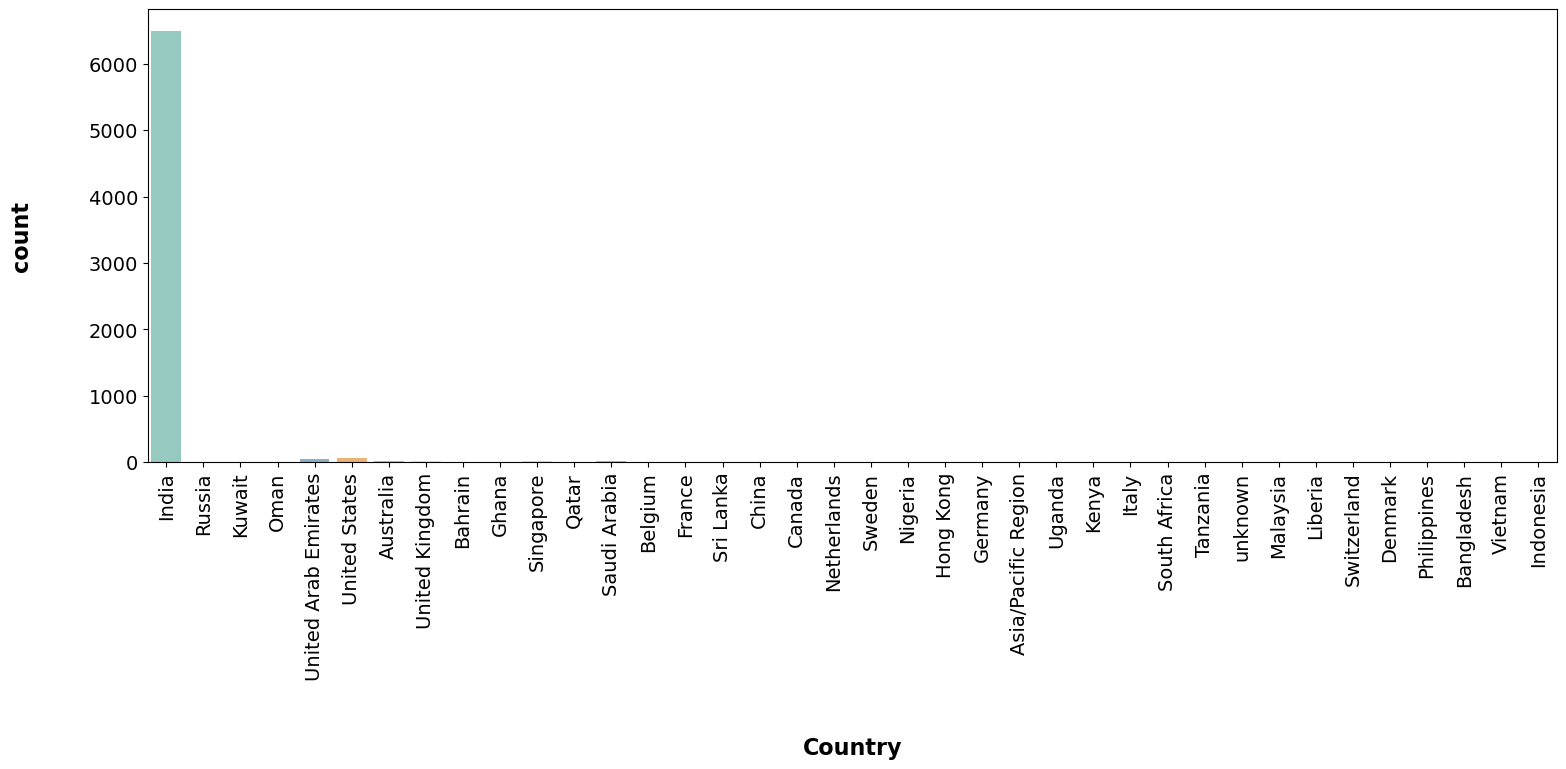

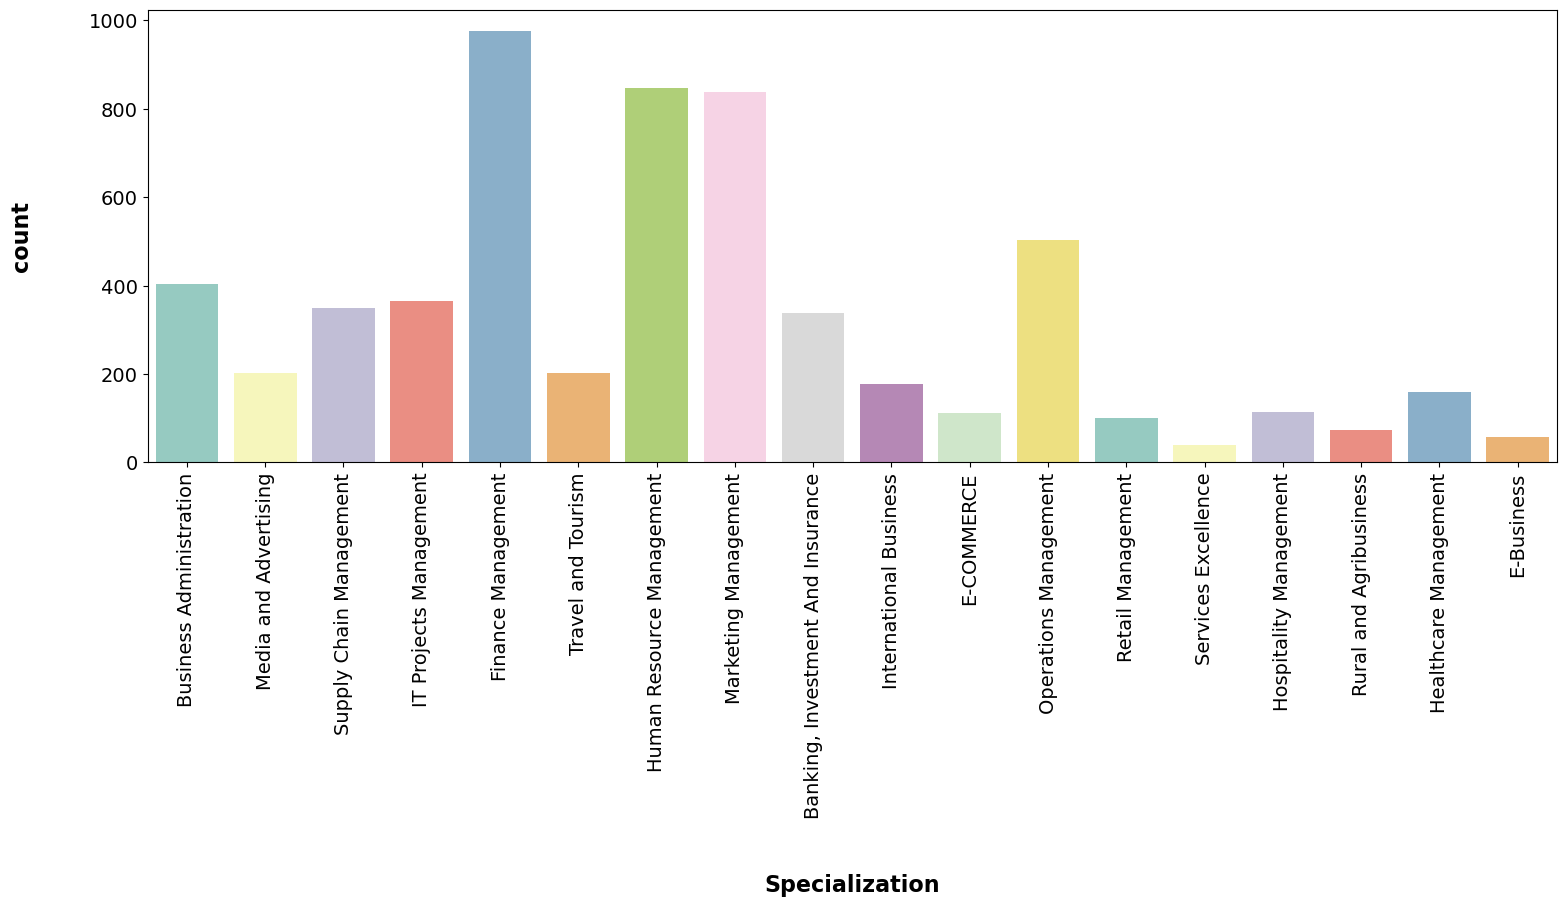

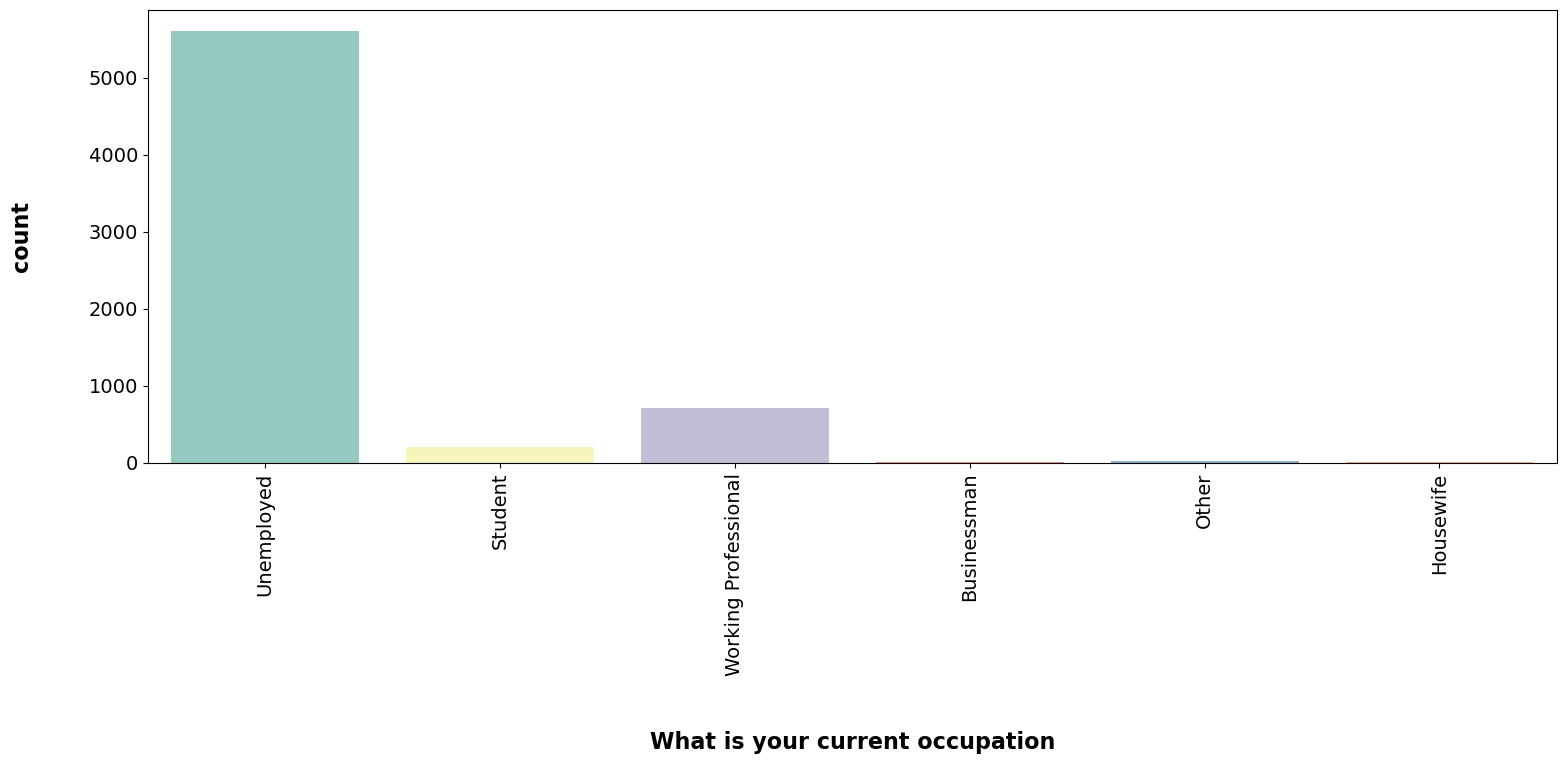

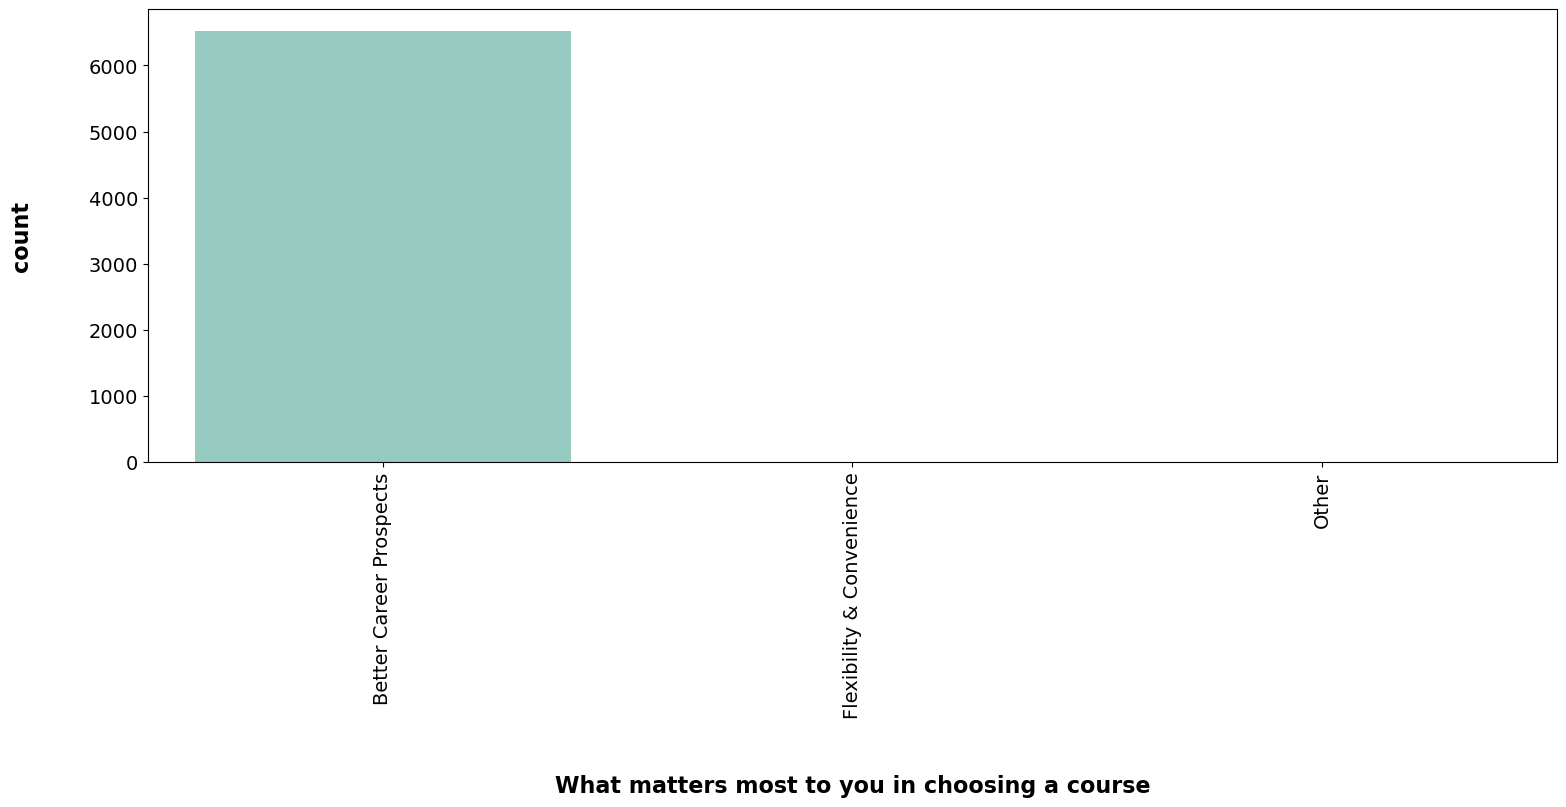

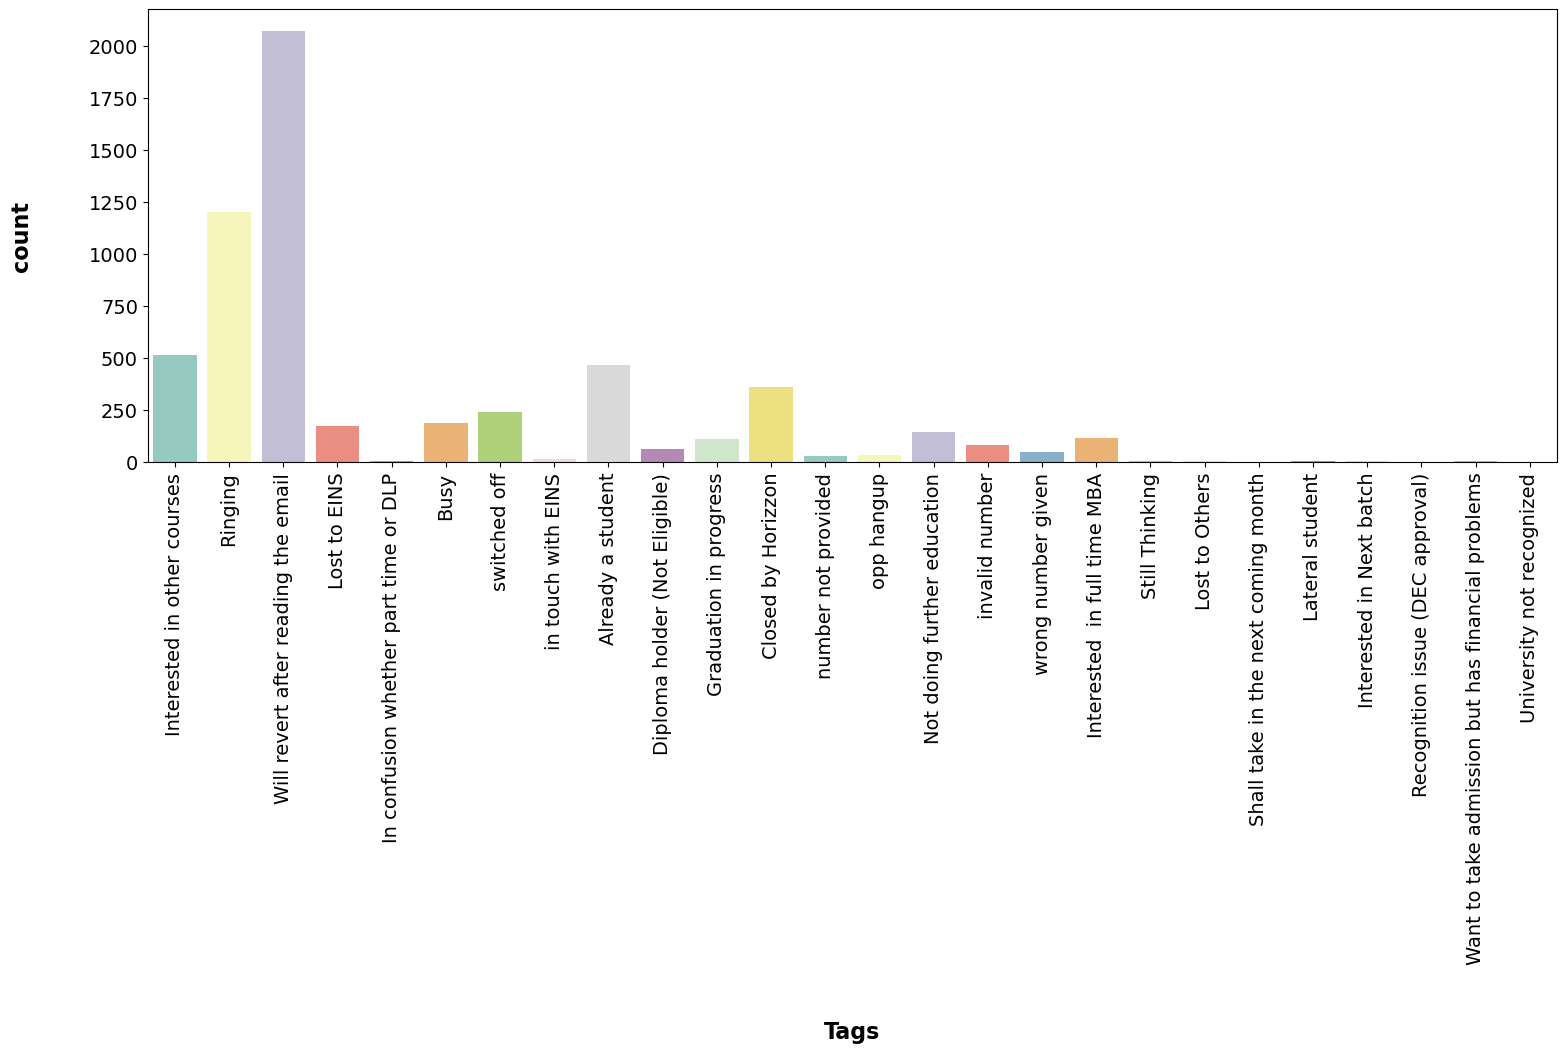

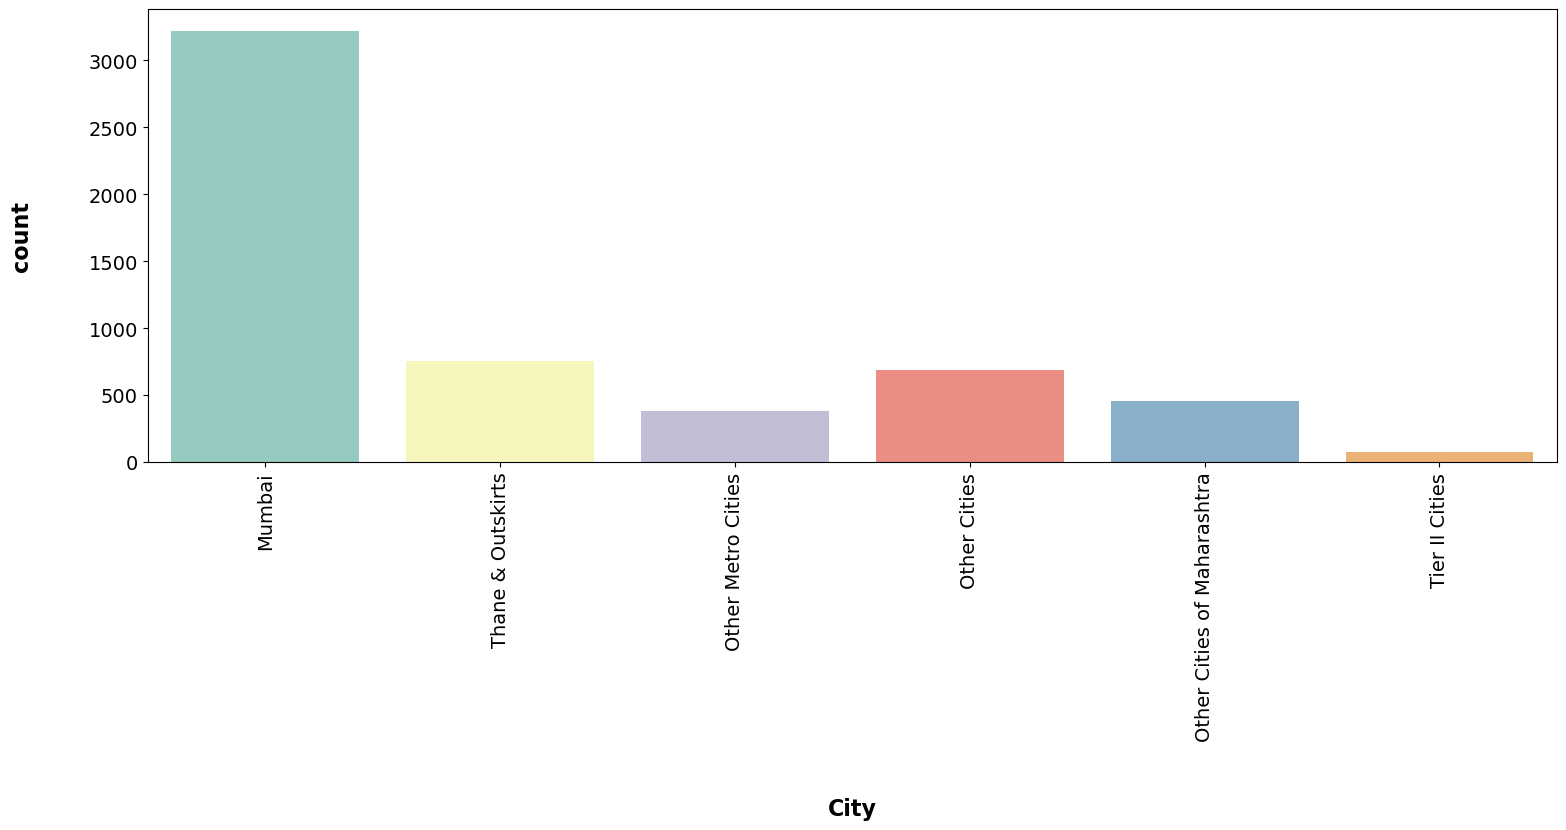

In [18]:
for var in cat_param:
    categorical_plot(var)

- From above graph for 'country' India is the highest in conversion so impute null vlaues with india
- in Specialization the finance managemnet is higher so will have nan values with others
- What is your current occupation: unemployed is more so replace nan values with same
- Only 'better career prospects' is higher in What matters most to you in choosing a course so can be removed.
- replace tags nan values which highest category

In [19]:
# Imputing the missing data in the 'Country' column with 'India'
data['Country']=data['Country'].replace(np.nan,'India')

In [20]:
round(data['Specialization'].value_counts(normalize=True),2)*100

Finance Management                   17.0
Human Resource Management            14.0
Marketing Management                 14.0
Operations Management                 9.0
Business Administration               7.0
IT Projects Management                6.0
Supply Chain Management               6.0
Banking, Investment And Insurance     6.0
Travel and Tourism                    3.0
Media and Advertising                 3.0
International Business                3.0
Healthcare Management                 3.0
Hospitality Management                2.0
E-COMMERCE                            2.0
Retail Management                     2.0
Rural and Agribusiness                1.0
E-Business                            1.0
Services Excellence                   1.0
Name: Specialization, dtype: float64

In [21]:
# Creating a separate category called 'Others' for this 
data['Specialization'] = data['Specialization'].replace(np.nan, 'Others')

In [22]:
data['What is your current occupation']=data['What is your current occupation'].replace(np.nan,'Unemployed')

In [23]:
#What matters most to you in choosing a course, What is your current occupation, Tags, Country, City
round(data['What matters most to you in choosing a course'].value_counts(normalize=True),2)*100

Better Career Prospects      100.0
Flexibility & Convenience      0.0
Other                          0.0
Name: What matters most to you in choosing a course, dtype: float64

In [24]:
data= data.drop('What matters most to you in choosing a course',axis=1)

In [25]:
#lets check Tags categories which has 36% missing values
round(data['Tags'].value_counts(normalize=True),2)*100

Will revert after reading the email                  35.0
Ringing                                              20.0
Interested in other courses                           9.0
Already a student                                     8.0
Closed by Horizzon                                    6.0
switched off                                          4.0
Busy                                                  3.0
Lost to EINS                                          3.0
Not doing further education                           2.0
Interested  in full time MBA                          2.0
Graduation in progress                                2.0
invalid number                                        1.0
Diploma holder (Not Eligible)                         1.0
wrong number given                                    1.0
opp hangup                                            1.0
number not provided                                   0.0
in touch with EINS                                    0.0
Lost to Others

Since Will revert after reading the email has highest percentage we can replace nan values with this.

In [26]:
data['Tags']=data['Tags'].replace(np.nan,'Will revert after reading the email')

In [27]:
round(data['City'].value_counts(normalize=True),2)*100

Mumbai                         58.0
Thane & Outskirts              13.0
Other Cities                   12.0
Other Cities of Maharashtra     8.0
Other Metro Cities              7.0
Tier II Cities                  1.0
Name: City, dtype: float64

In [28]:
data['City']=data['City'].replace(np.nan,'Others')

In [29]:
round(data.isnull().sum()/data.shape[0],2)*100

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 1.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        1.0
Last Activity                               1.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                 

remaining missing values less in number so can be dropped.

In [30]:
data.dropna(inplace=True)
data.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call Converted  TotalVisits  \
0      Olark Chat           No          No        No          0.0   
1  Organic Search           No          No        No          5.0   
2  Direct Traffic           No          No       Yes          2.0   
3  Direct Traffic           No          No        No          1.0   
4          Google           No          No       Yes          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Digital Advertisement Through Recommendations  \
0                    No                      No   
1                    No                      No   
2                    No                      No   
3                    No                      No   
4                    No                      No   

  Receive More Updates About Our Courses                                 Tags  \
0                                     No          Interested in other courses   
1                                     No                              Ringing   
2                                     No  Will revert after reading the email   
3                                     No                              Ringing   
4                                     No  Will revert after reading the email   

  Update me on Supply Chain Content Get updates on DM Content    City  \
0                                No                        No  Others   
1                                No                        No  Others   
2                                No                        No  Mumbai   
3                                No                        No  Mumbai   
4                                No                        No  Mumbai   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 29 columns]

### EDA with target variable

In [31]:
#lets check the target var for any data imbalance
data['Converted'].value_counts(normalize=True)

No     0.621446
Yes    0.378554
Name: Converted, dtype: float64

The lead conversion rate is ~38%.

#### Lets check few category variables with target

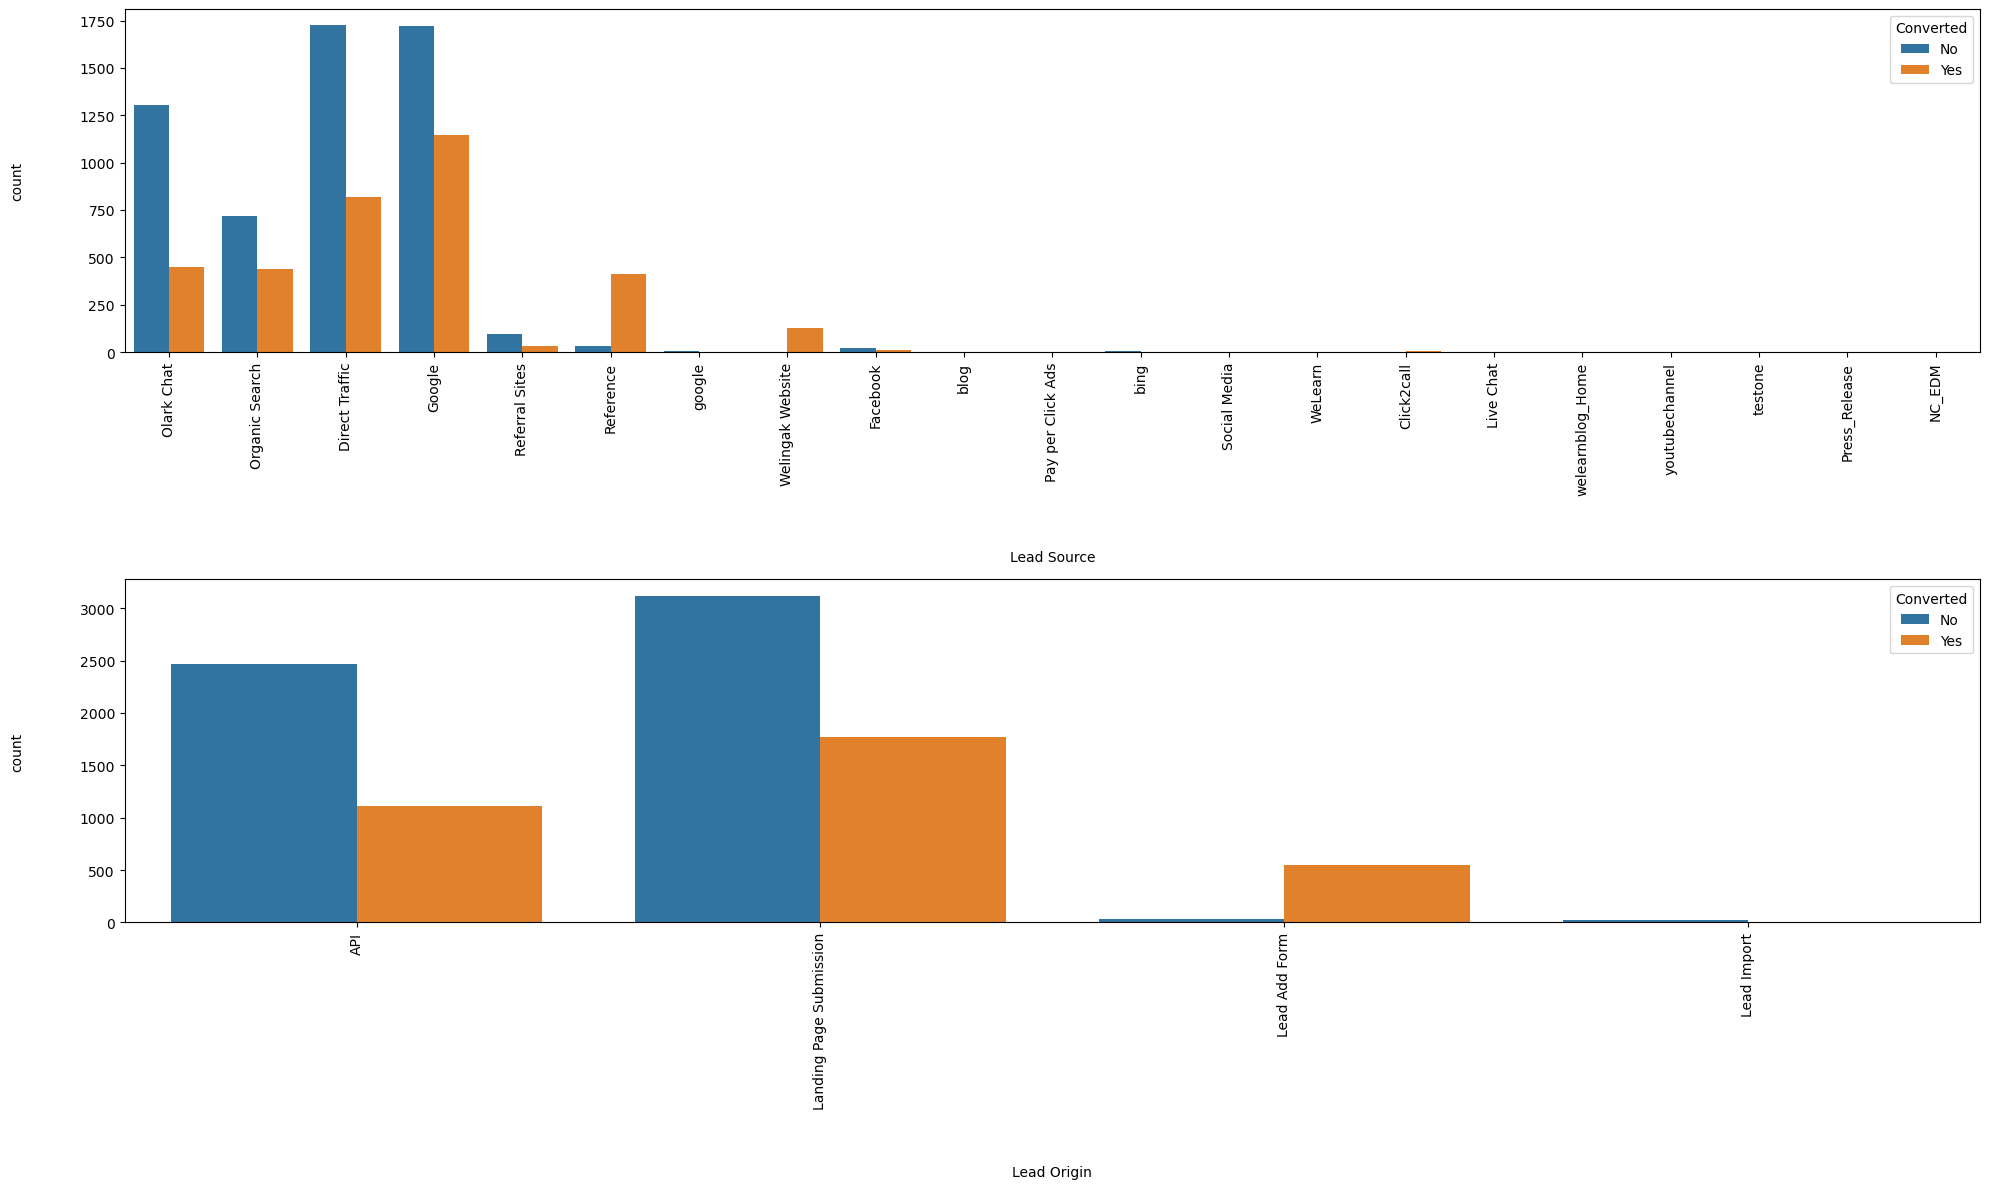

In [32]:
fig=plt.subplots(figsize=(20,12))

for i, feature in enumerate(['Lead Source','Lead Origin']):
    plt.subplot(2,1,i+1)
    plt.subplots_adjust(hspace=2.0)
    sns.countplot(x=feature, hue='Converted', data=data)
    plt.xticks(rotation=90)
    plt.tight_layout()

Lead Source: 
- API and landing page submission has less conversion rate(~30%) but counts of leads from them are considerable.
- From Lead Origin finding, maximum lead conversion happened from Landing Page Submission.
- count of leads in lead add form is less but conversion rate seems high
- lead import can be removed since it has less count

To improve overall lead conversion rate, we need to focus more on improving lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.

Lead  Origin:
- From the above graph, major lead conversion in the lead source is from 'Google'
- As we can see lead count in other sources are less so will replace those with new category for better analysis.

In [33]:
data['Lead Source']= data['Lead Source'].replace(['Facebook','Click2call','bing','Social Media','Live Chat','Pay per Click Ads','WeLearn','testone','Press_Release','blog','NC_EDM','welearnblog_Home','youtubechannel','google'], 'Others')

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Olark Chat'),
  Text(1, 0, 'Organic Search'),
  Text(2, 0, 'Direct Traffic'),
  Text(3, 0, 'Google'),
  Text(4, 0, 'Referral Sites'),
  Text(5, 0, 'Reference'),
  Text(6, 0, 'Others'),
  Text(7, 0, 'Welingak Website')])

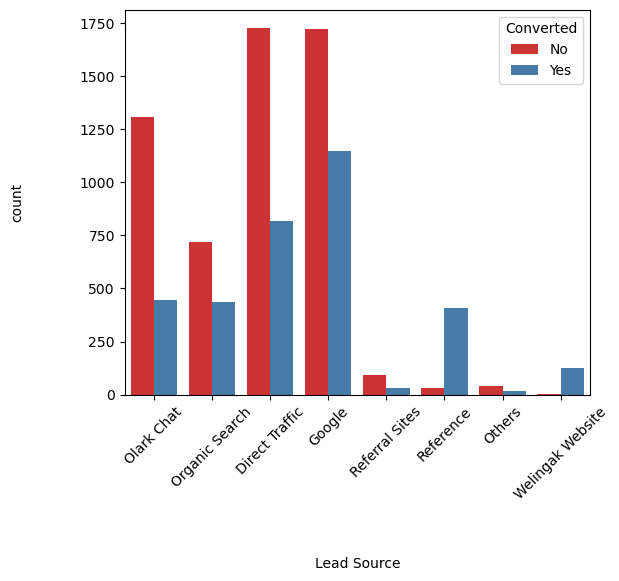

In [34]:
plt.figure(figsize=(6,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = data,palette='Set1')
plt.xticks(rotation = 45)

In [35]:
round(data['Lead Source'].value_counts(normalize=True),2)*100

Google              32.0
Direct Traffic      28.0
Olark Chat          19.0
Organic Search      13.0
Reference            5.0
Welingak Website     1.0
Referral Sites       1.0
Others               1.0
Name: Lead Source, dtype: float64

- Google and Direct traffic generates maximum number of leads.
- Conversion Rate of reference leads and leads through welingak website is high.
- To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads.

Email related categories

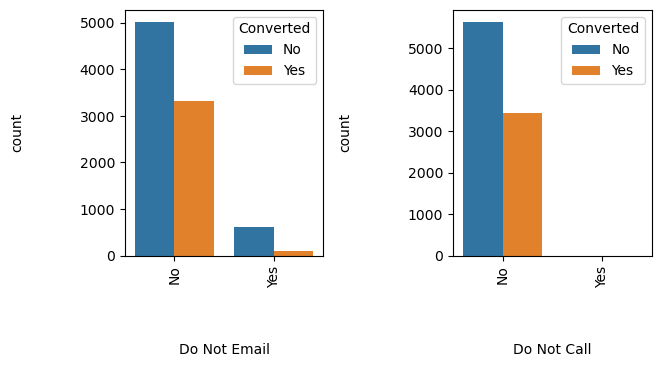

In [36]:
fig=plt.subplots(figsize=(10,10))

for i, feature in enumerate(['Do Not Email','Do Not Call']):
    plt.subplot(3,3,i+1)
    plt.subplots_adjust(hspace=3.0)
    sns.countplot(x=feature, hue='Converted', data=data)
    plt.xticks(rotation=90)
    plt.tight_layout()

From above graph most of the convertion leads are in No, so this parameter not good for analysis.

#### Now we will check on Numerical variables along with target.

In [37]:
numerical_col=['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

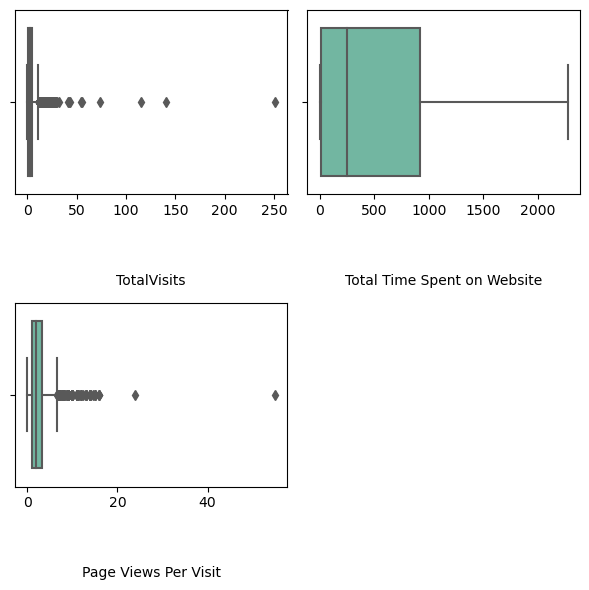

In [38]:
fig=plt.subplots(figsize=(6,6))

for i, feature in enumerate(numerical_col):
    plt.subplot(2,2,i+1)
    plt.subplots_adjust(hspace=4.0)
    sns.boxplot(x=feature, data=data, orient=None,palette='Set2')
    plt.tight_layout()
   

We can see there are a number of outliers in the data of Total visits. We will cap the outliers to 95% value for analysis.

In [39]:
Q1 = data['TotalVisits'].quantile(0.95)
data['TotalVisits'][data['TotalVisits']>= Q1]= Q1

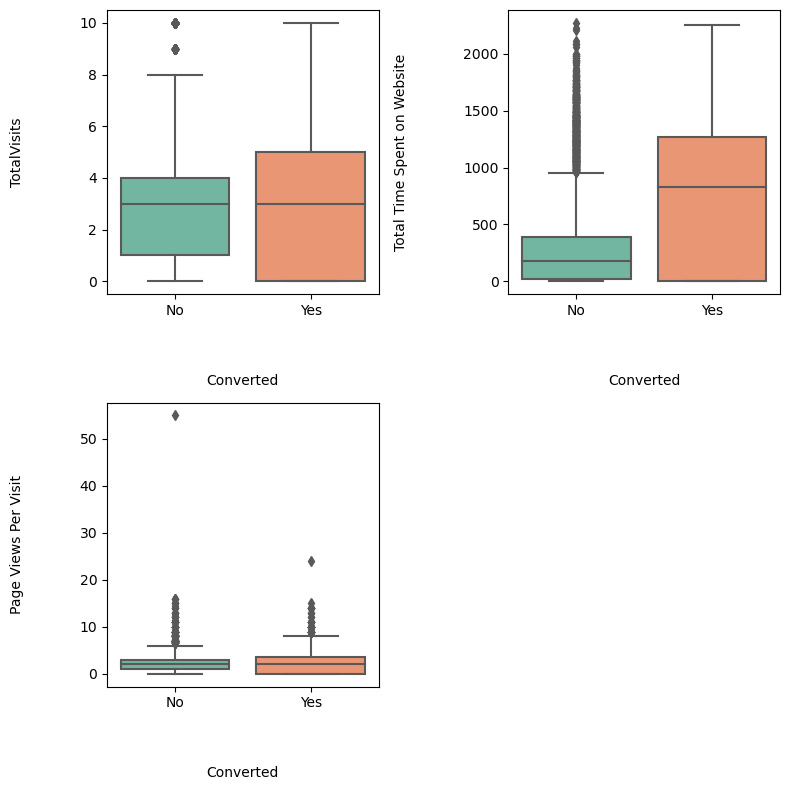

In [40]:
ig=plt.subplots(figsize=(8,8))

for i, feature in enumerate(['TotalVisits','Total Time Spent on Website','Page Views Per Visit']):
    plt.subplot(2,2,i+1)
   # plt.subplots_adjust(hspace=3.0)
    sns.boxplot(y=feature, x='Converted', data=data,orient='v',palette='Set2')
    plt.tight_layout()
   

- Median line is same for converted and not converted in totalvisits 
- There is a change increase in chnaces of conversion can be seen in 'Total time spent on website' , Website should be made more engaging to make leads spend more time.

In [41]:
#lets check for page visits
data['Page Views Per Visit'].describe()

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
25%         1.000000
50%         2.000000
75%         3.200000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [42]:
Q1 = data['Page Views Per Visit'].quantile(0.95)
data['Page Views Per Visit'][data['Page Views Per Visit']>= Q1]= Q1

<Axes: xlabel='Page Views Per Visit', ylabel='Converted'>

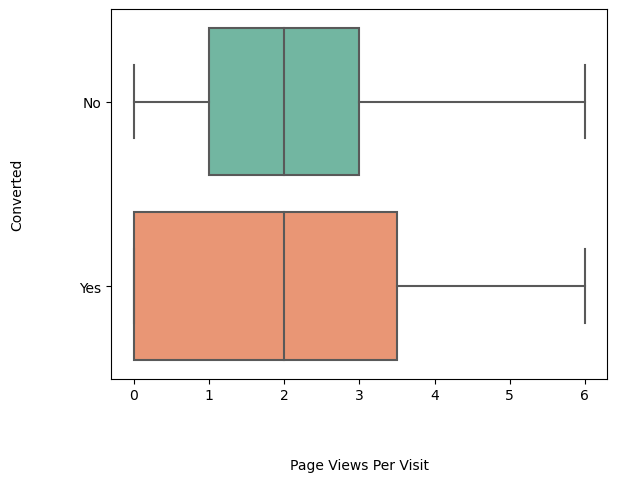

In [43]:
sns.boxplot(x='Page Views Per Visit', y='Converted', data=data, orient='h',palette='Set2')

After removing outliers , Median for converted and unconverted leads are the same., Nothing can be said specifically for lead conversion from Page Views Per Visit

In [44]:
#function to check with target
def categorical_plot1(var):
    plt.figure(figsize=(35,20))
    
    plt.rcParams['axes.labelpad'] = 40
    plt.subplot(1, 2, 1)
    sns.countplot(x=var, data=data, palette = 'Set2', hue='Converted') 
    plt.xlabel(var, fontsize= 14, fontweight="bold")                                                         
    plt.ylabel('Count', fontsize= 14, fontweight="bold")
    plt.xticks(rotation=90, fontsize=12)
    plt.yticks(rotation=360, fontsize=12)

In [45]:
cat2= ['Last Activity','Country','Specialization', 'What is your current occupation','Tags']

In [46]:
data['Last Activity']= data['Last Activity'].replace(['View in browser link Clicked','Visited Booth in Tradeshow','Approached upfront','Email Received','Email Marked Spam'], 'Others')

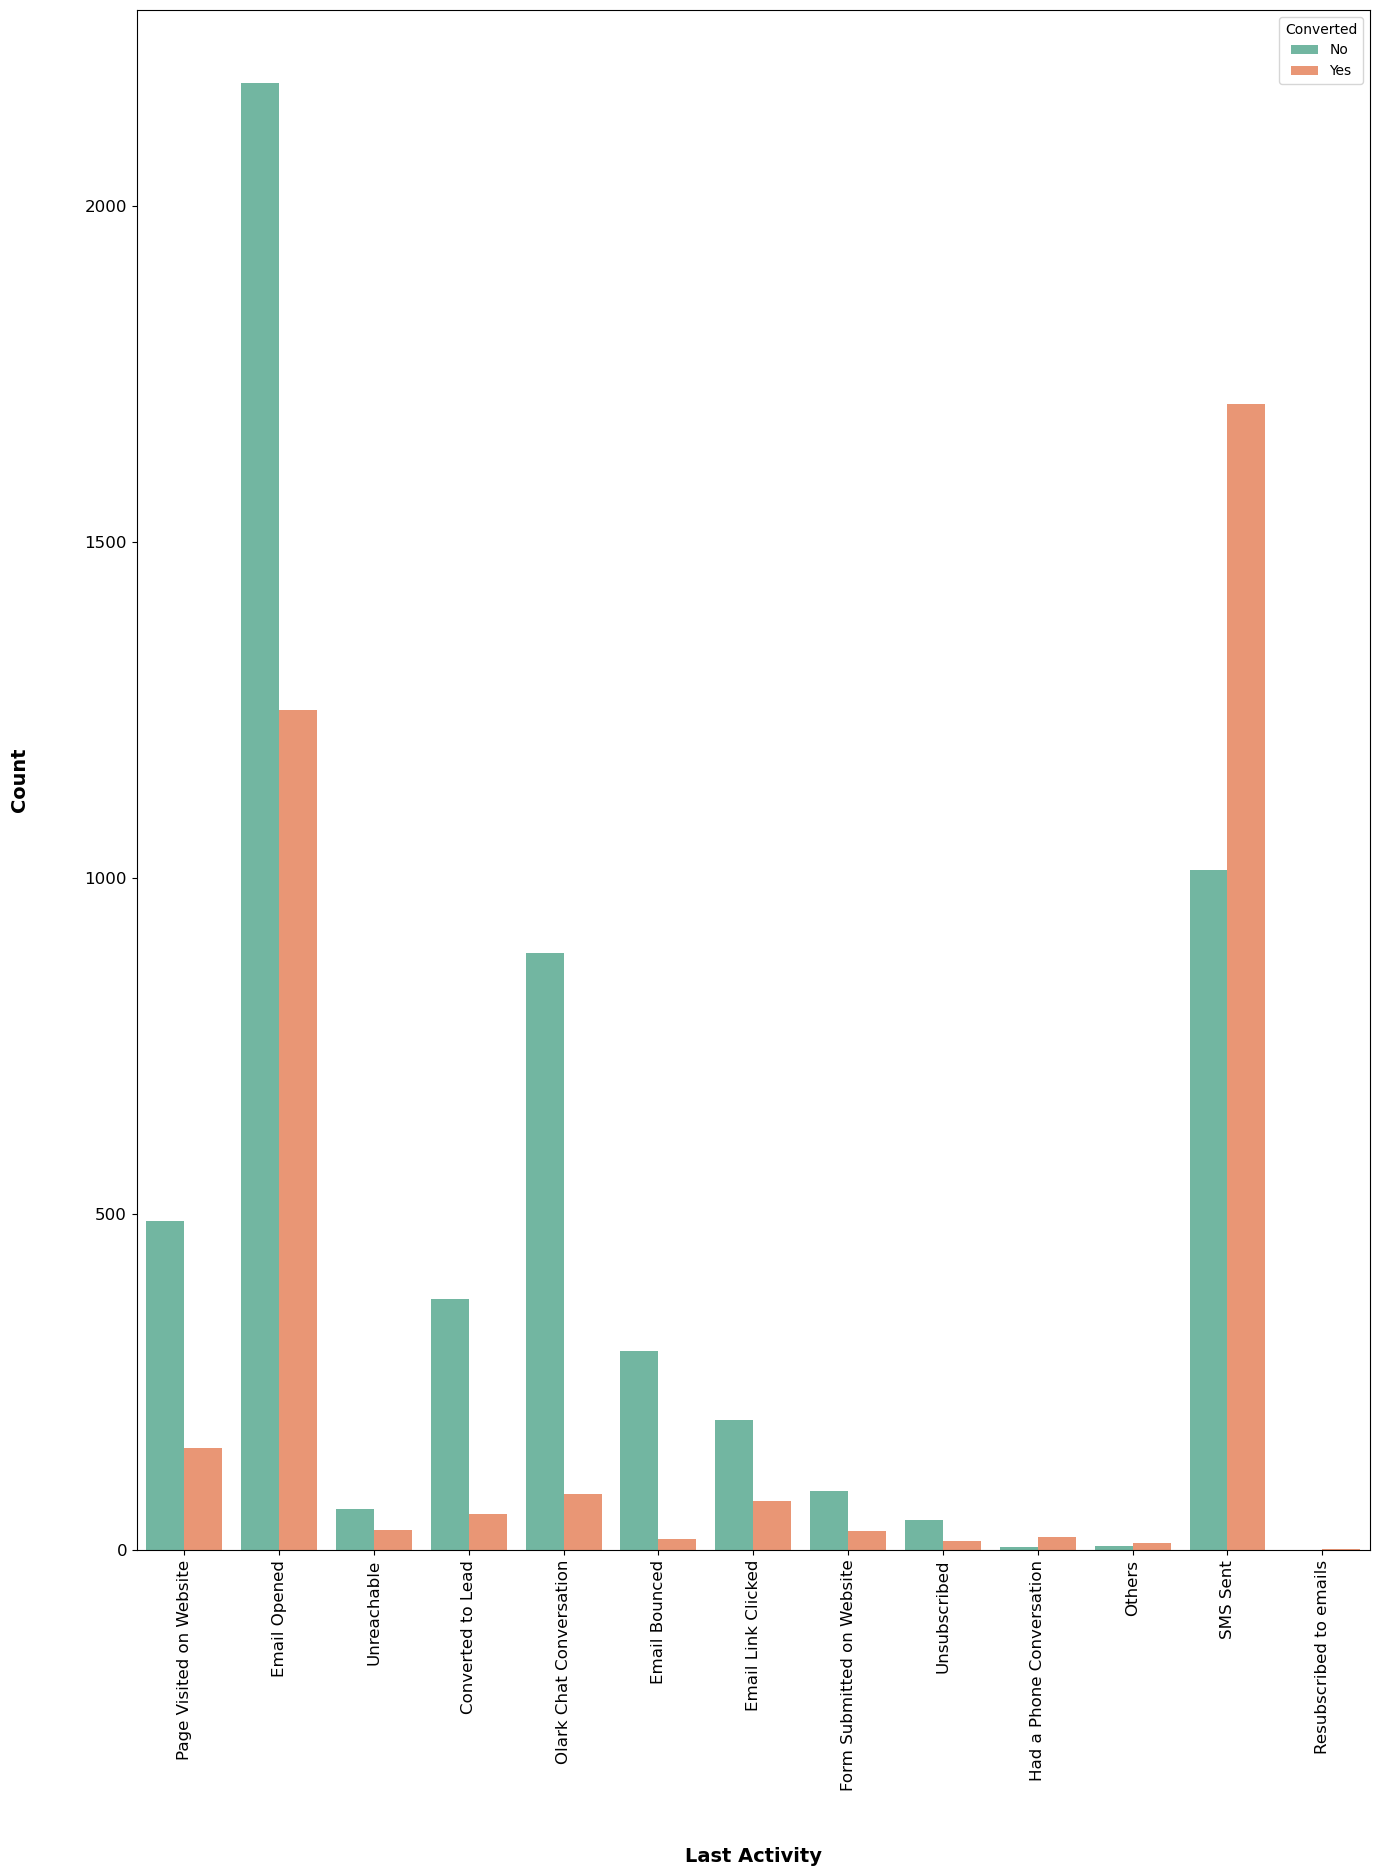

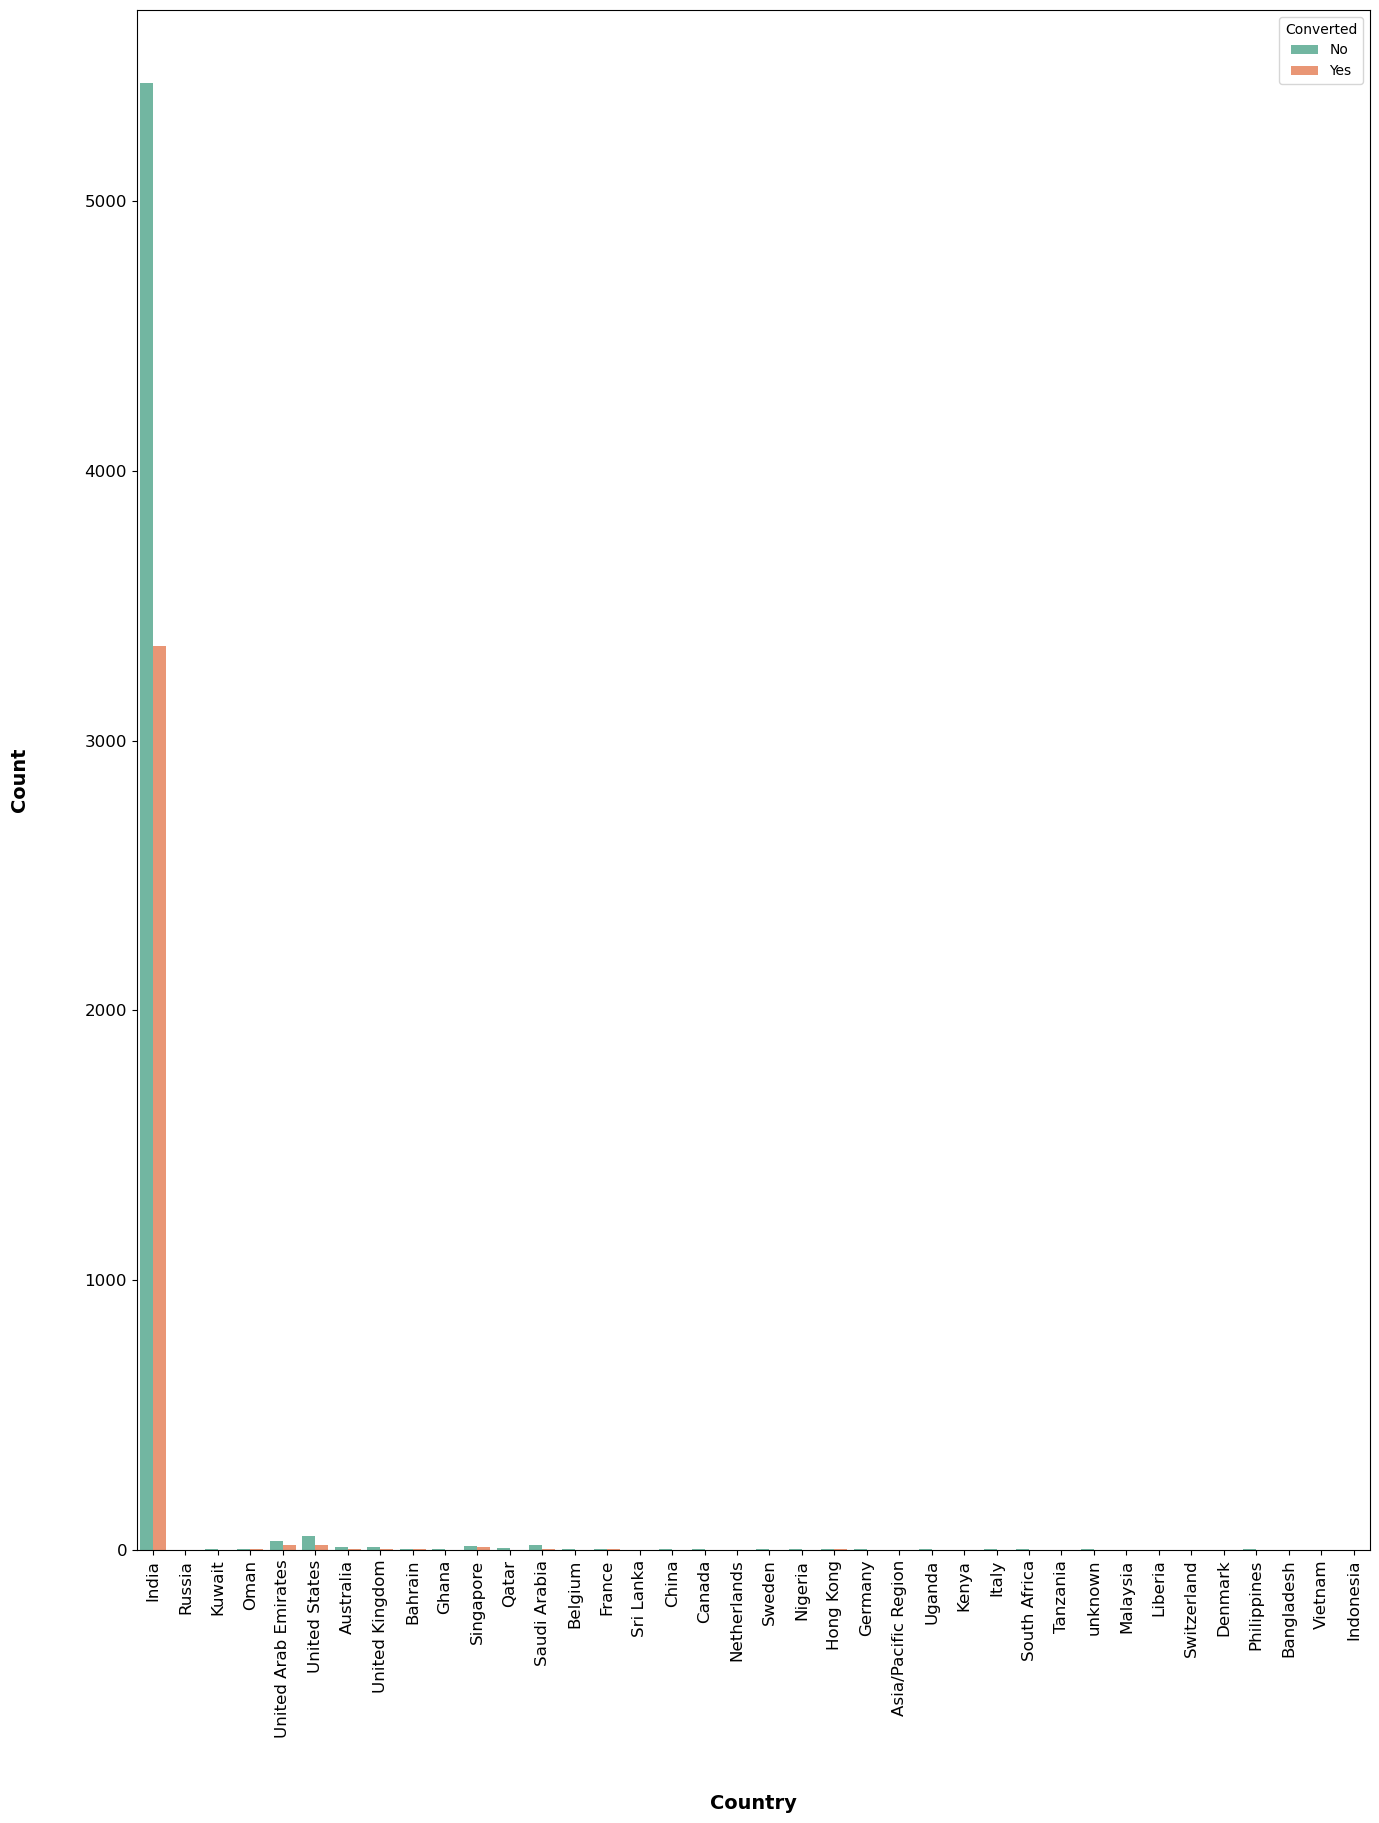

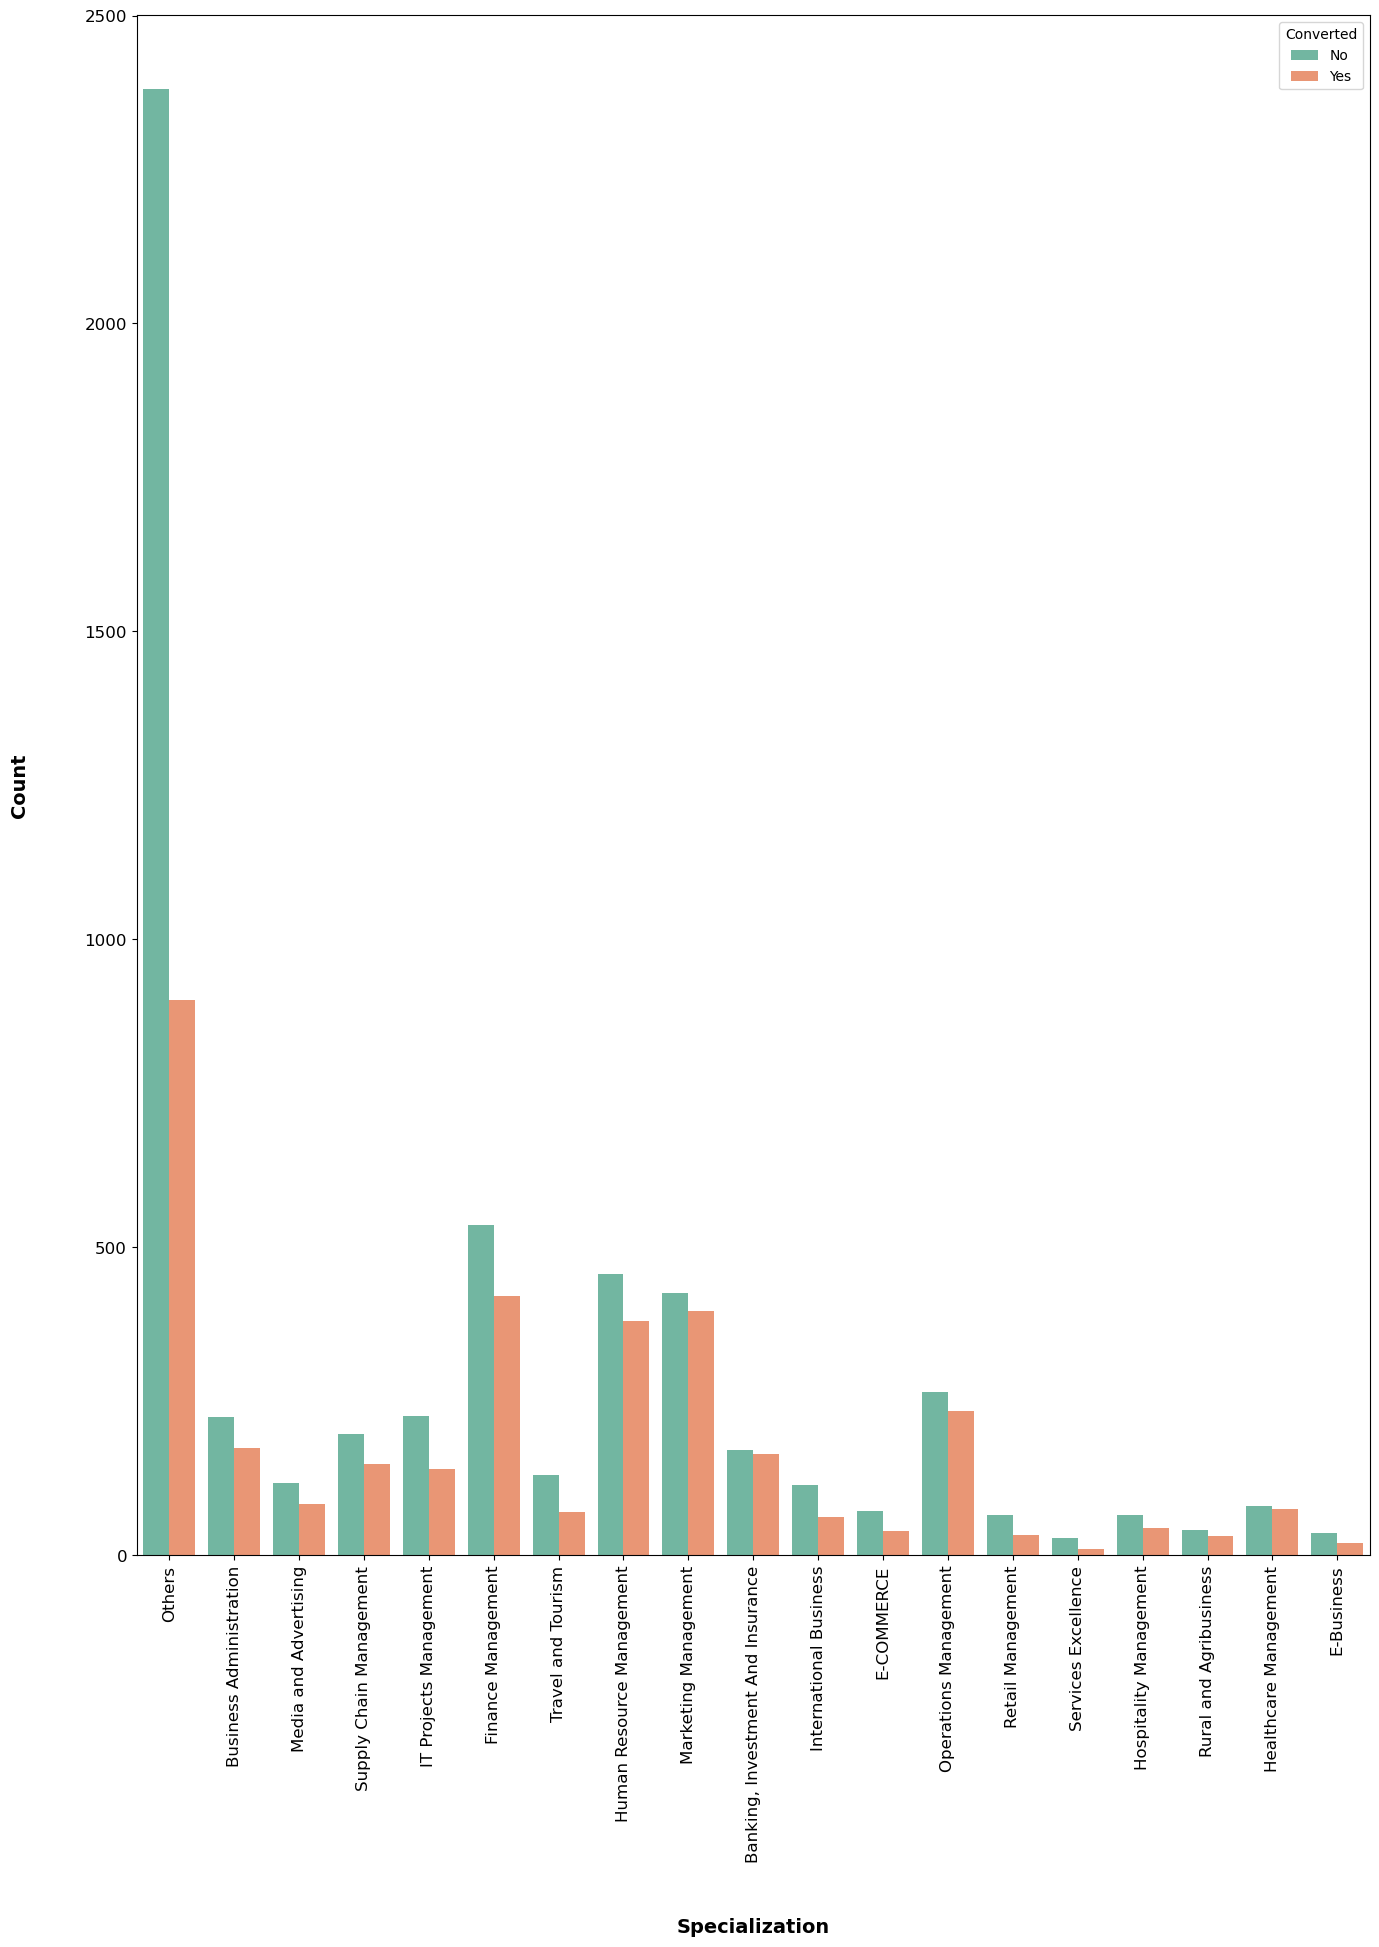

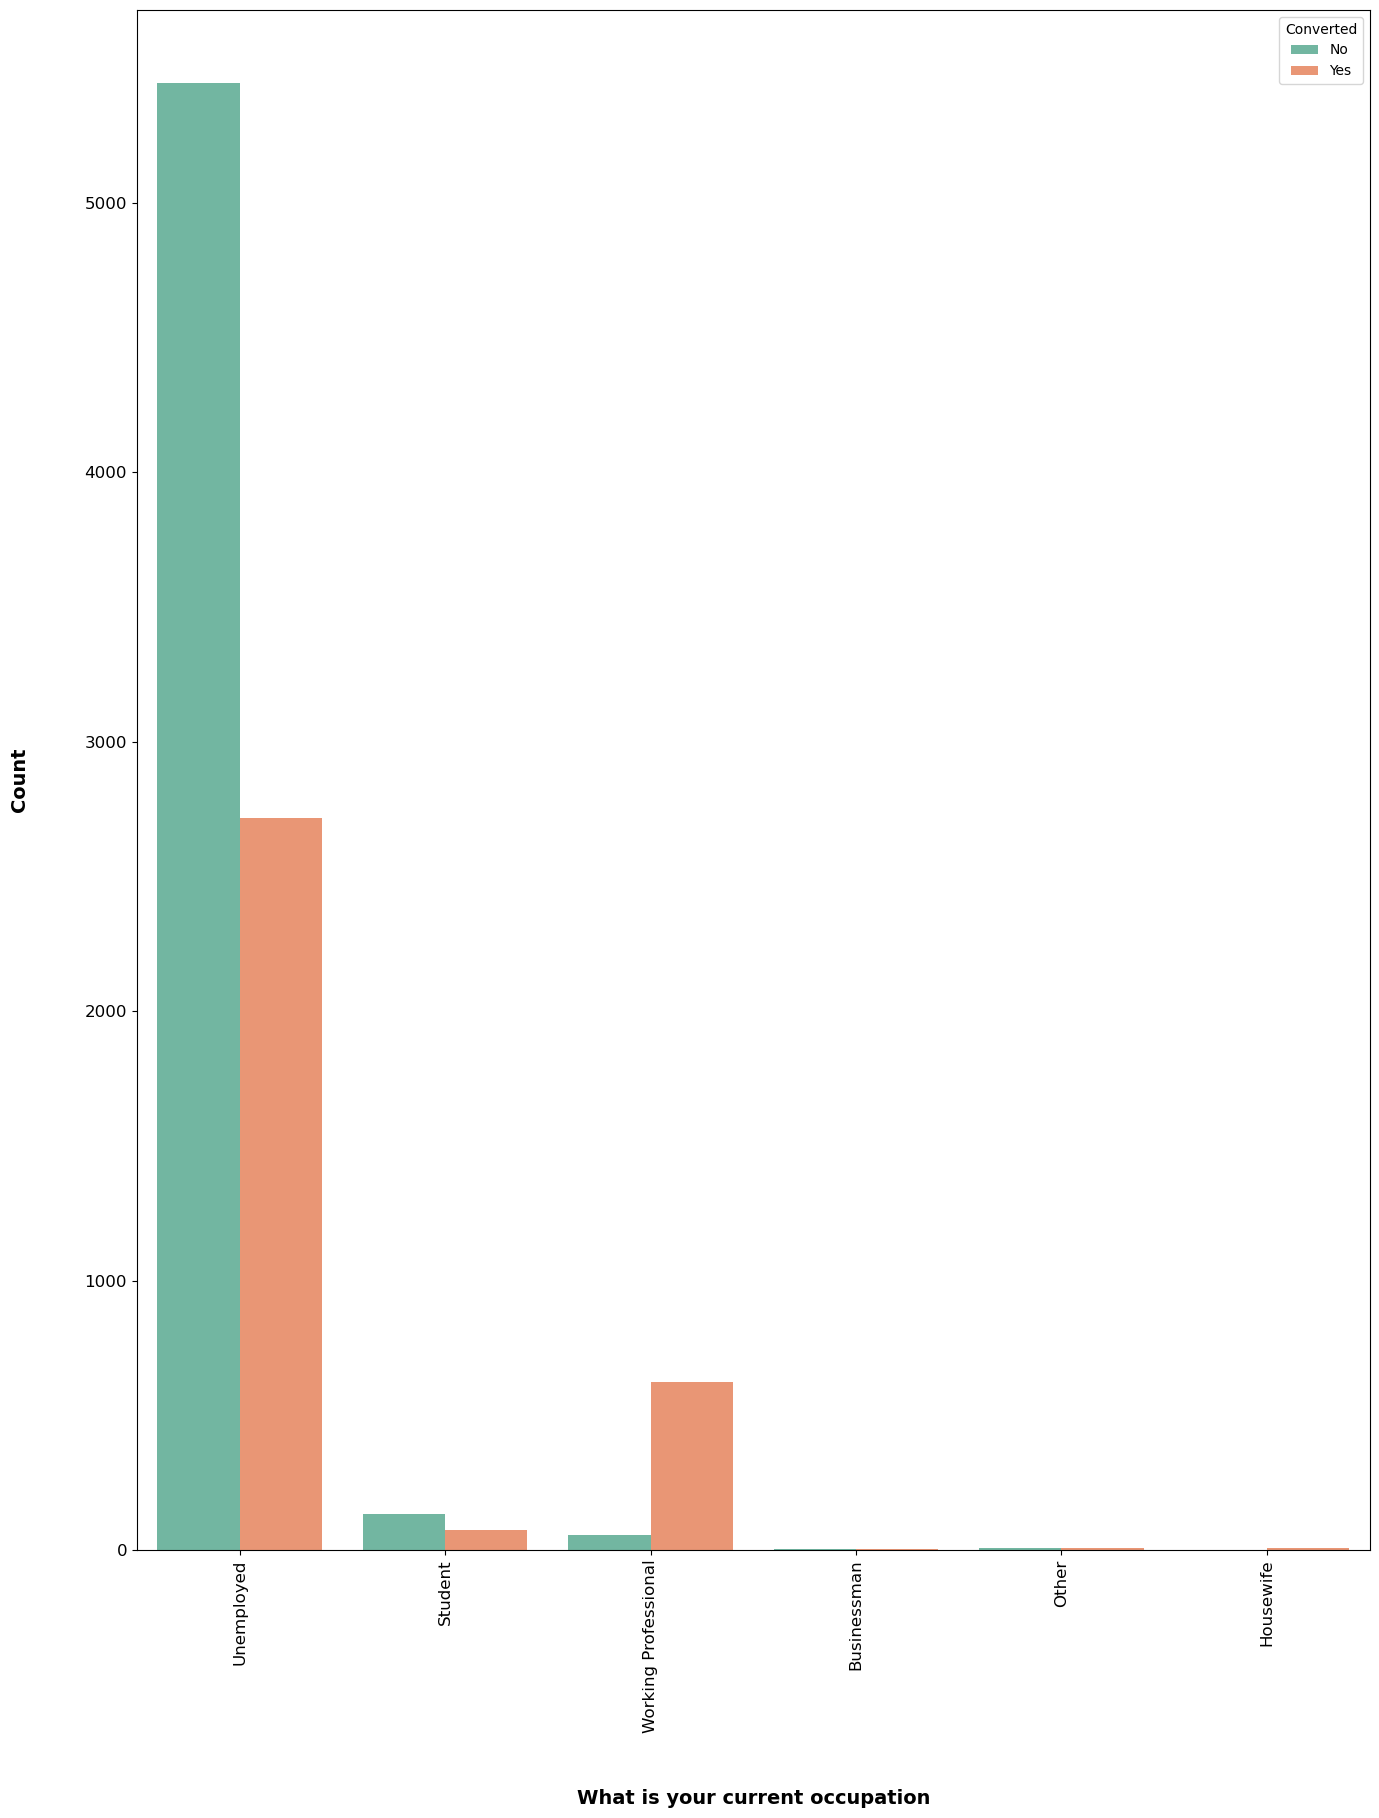

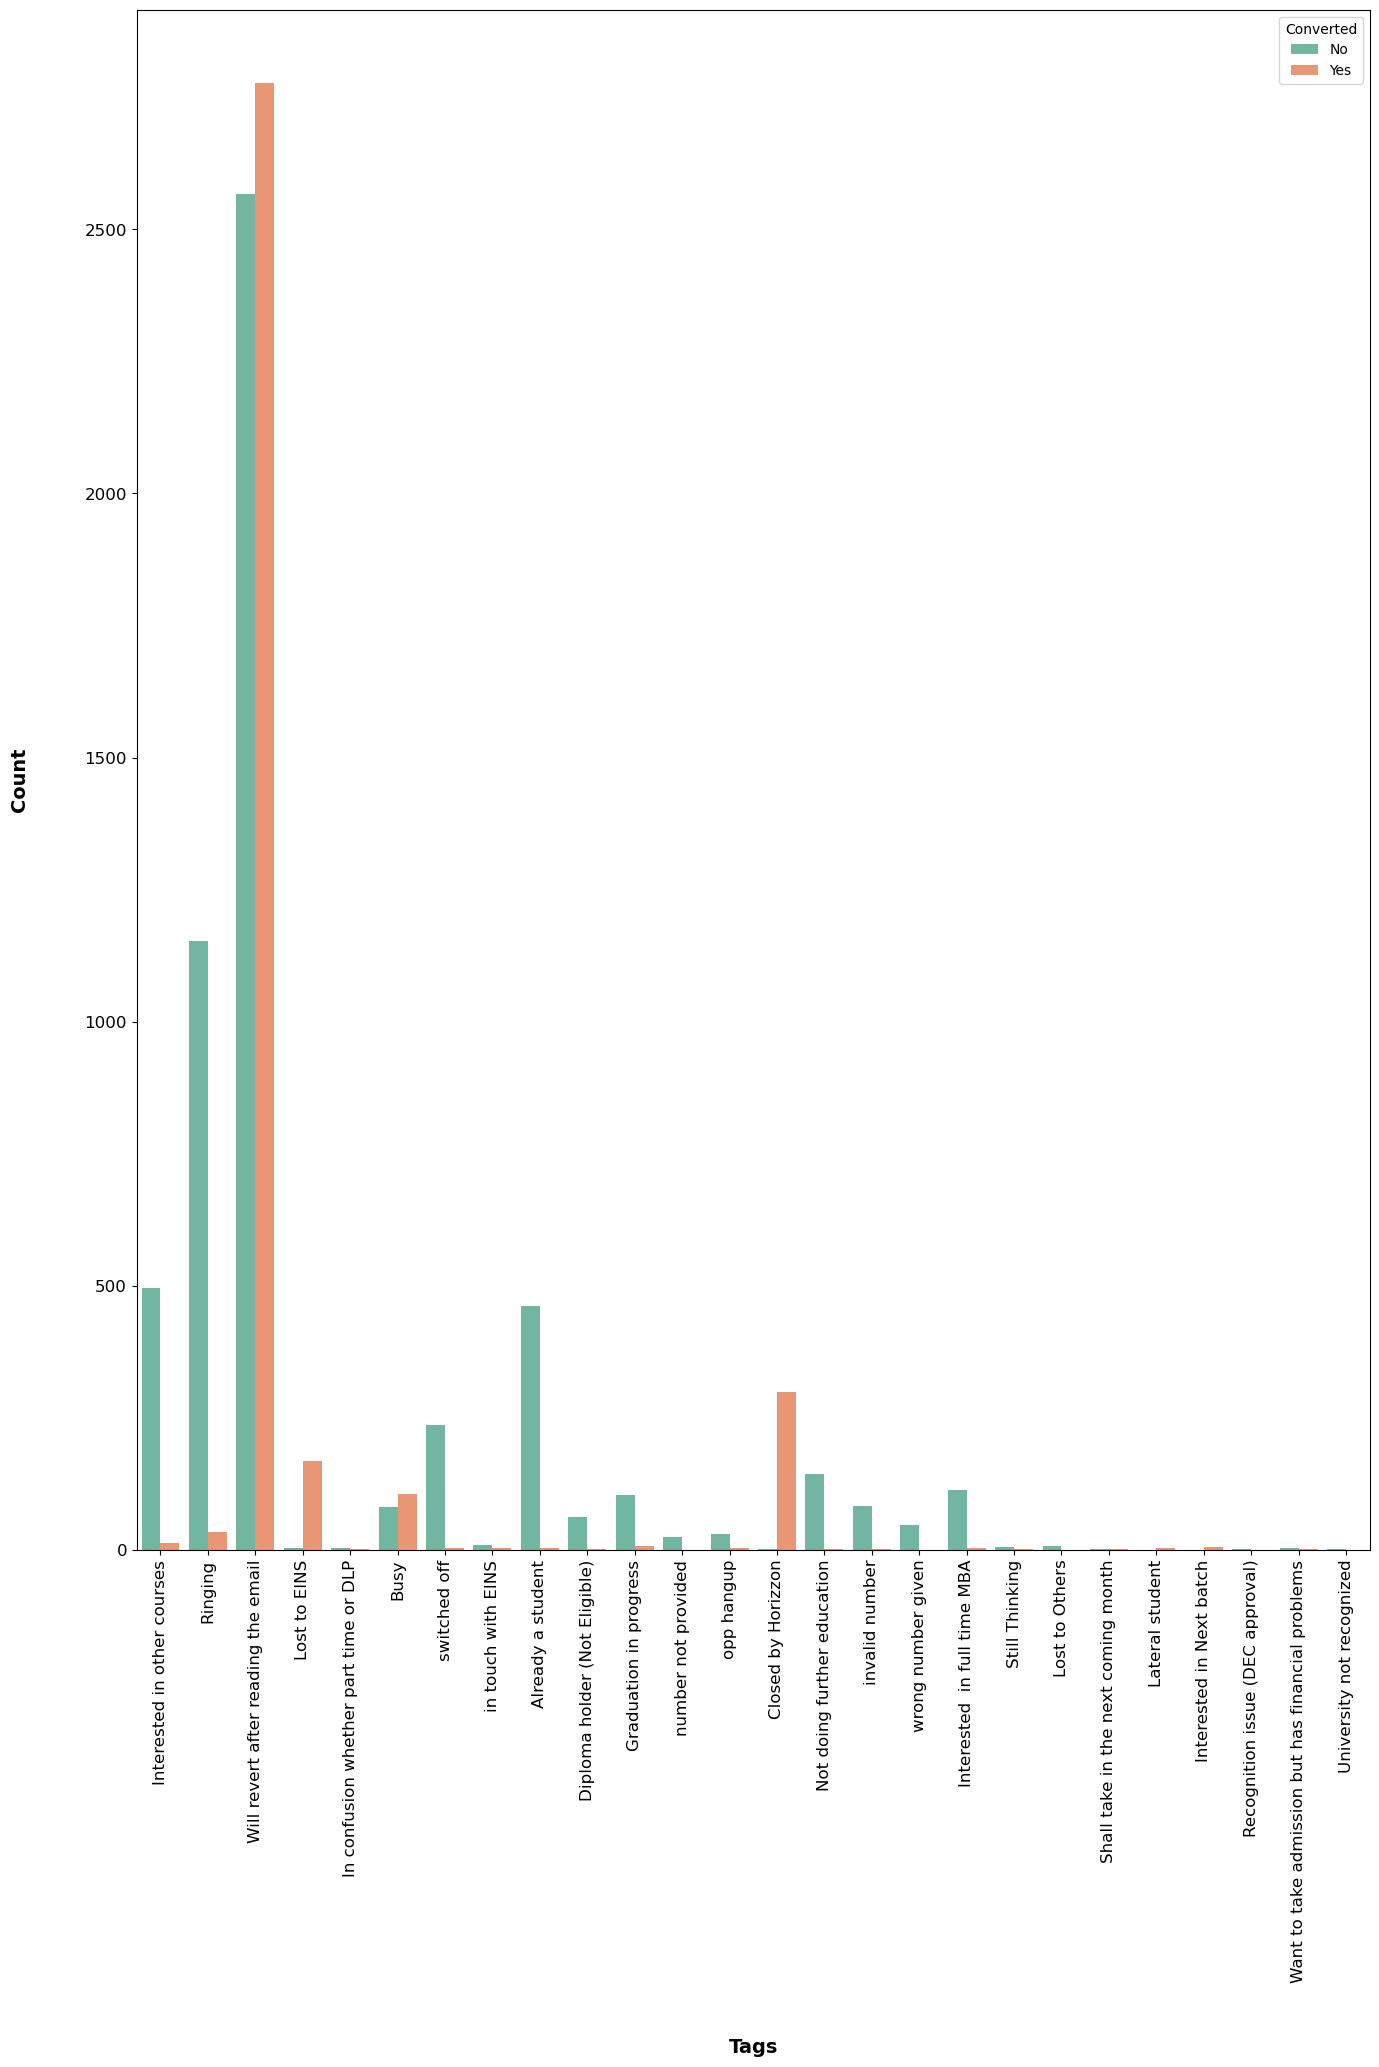

In [47]:
for var in cat2:
    categorical_plot1(var)

- Conversion rate for leads with SMS Sent last activity is higher compare to others
- Most of the non leads have their Email opened in last activity.
 Should increase in converison rate of those having last acitivity as Email opened and also try to increase the count for SMS sent.

Based on the univariate analysis we have seen that many columns are not adding any information to the model, hence we can drop them for further analysis

customer had seen ad & score assigned to each customer data came from sales teams which doent give inferences so can be removed

In [48]:
data = data.drop(['Prospect ID','Lead Number','Search','Magazine','Newspaper Article','X Education Forums',
                            'Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                            'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque',
                            'A free copy of Mastering The Interview'],1)

## Dummy variable creation

In [49]:
#Creating a dummy variables for 4 categories and dropping the first level. 
cat_d=['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','Tags','City']

In [50]:
dummy = pd.get_dummies(data[cat_d], drop_first=True)
dummy.head()

Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Google  Lead Source_Olark Chat  \
0                        0                   0                       1   
1                        0                   0                       0   
2                        0                   0                       0   
3                        0                   0                       0   
4                        0                   1                       0   

   Lead Source_Organic Search  Lead Source_Others  Lead Source_Reference  \
0                           0                   0                      0   
1                           1                   0                      0   
2                           0                   0                      0   
3                           0                   0                      0   
4                           0                   0                      0   

   Lead Source_Referral Sites  Lead Source_Welingak Website  ...  \
0                           0                             0  ...   
1                           0                             0  ...   
2                           0                             0  ...   
3                           0                             0  ...   
4                           0                             0  ...   

   Tags_number not provided  Tags_opp hangup  Tags_switched off  \
0                         0                0                  0   
1                         0                0                  0   
2                         0                0                  0   
3                         0                0                  0   
4                         0                0                  0   

   Tags_wrong number given  City_Other Cities  \
0                        0                  0   
1                        0                  0   
2                        0                  0   
3                        0                  0   
4                        0                  0   

   City_Other Cities of Maharashtra  City_Other Metro Cities  City_Others  \
0                                 0                        0            1   
1                                 0                        0            1   
2                                 0                        0            0   
3                                 0                        0            0   
4                                 0                        0            0   

   City_Thane & Outskirts  City_Tier II Cities  
0                       0                    0  
1                       0                    0  
2                       0                    0  
3                       0                    0  
4                       0                    0  

[5 rows x 76 columns]

In [51]:
# Adding these dummies to our original dataset
data = pd.concat([data,dummy],axis=1)

In [52]:
#dropping the duplicate columns
data = data.drop(cat_d, axis=1)
data.head()

Do Not Email Do Not Call Converted  TotalVisits  \
0           No          No        No          0.0   
1           No          No        No          5.0   
2           No          No       Yes          2.0   
3           No          No        No          1.0   
4           No          No       Yes          2.0   

   Total Time Spent on Website  Page Views Per Visit Country  \
0                            0                   0.0   India   
1                          674                   2.5   India   
2                         1532                   2.0   India   
3                          305                   1.0   India   
4                         1428                   1.0   India   

  Last Notable Activity  Lead Origin_Landing Page Submission  \
0              Modified                                    0   
1          Email Opened                                    0   
2          Email Opened                                    1   
3              Modified                                    1   
4              Modified                                    1   

   Lead Origin_Lead Add Form  ...  Tags_number not provided  Tags_opp hangup  \
0                          0  ...                         0                0   
1                          0  ...                         0                0   
2                          0  ...                         0                0   
3                          0  ...                         0                0   
4                          0  ...                         0                0   

   Tags_switched off  Tags_wrong number given  City_Other Cities  \
0                  0                        0                  0   
1                  0                        0                  0   
2                  0                        0                  0   
3                  0                        0                  0   
4                  0                        0                  0   

   City_Other Cities of Maharashtra  City_Other Metro Cities  City_Others  \
0                                 0                        0            1   
1                                 0                        0            1   
2                                 0                        0            0   
3                                 0                        0            0   
4                                 0                        0            0   

   City_Thane & Outskirts  City_Tier II Cities  
0                       0                    0  
1                       0                    0  
2                       0                    0  
3                       0                    0  
4                       0                    0  

[5 rows x 84 columns]

In [53]:
data.describe()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
count  9074.000000                  9074.000000           9074.000000   
mean      3.191867                   482.887481              2.265943   
std       2.780618                   545.256560              1.790991   
min       0.000000                     0.000000              0.000000   
25%       1.000000                    11.000000              1.000000   
50%       3.000000                   246.000000              2.000000   
75%       5.000000                   922.750000              3.200000   
max      10.000000                  2272.000000              6.000000   

       Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
count                          9074.000000                9074.000000   
mean                              0.538351                   0.064029   
std                               0.498554                   0.244818   
min                               0.000000                   0.000000   
25%                               0.000000                   0.000000   
50%                               1.000000                   0.000000   
75%                               1.000000                   0.000000   
max                               1.000000                   1.000000   

       Lead Origin_Lead Import  Lead Source_Google  Lead Source_Olark Chat  \
count              9074.000000         9074.000000             9074.000000   
mean                  0.003306            0.316068                0.193189   
std                   0.057407            0.464965                0.394822   
min                   0.000000            0.000000                0.000000   
25%                   0.000000            0.000000                0.000000   
50%                   0.000000            0.000000                0.000000   
75%                   0.000000            1.000000                0.000000   
max                   1.000000            1.000000                1.000000   

       Lead Source_Organic Search  Lead Source_Others  ...  \
count                 9074.000000         9074.000000  ...   
mean                     0.127177            0.006502  ...   
std                      0.333189            0.080377  ...   
min                      0.000000            0.000000  ...   
25%                      0.000000            0.000000  ...   
50%                      0.000000            0.000000  ...   
75%                      0.000000            0.000000  ...   
max                      1.000000            1.000000  ...   

       Tags_number not provided  Tags_opp hangup  Tags_switched off  \
count               9074.000000      9074.000000        9074.000000   
mean                   0.002755         0.003637           0.026449   
std                    0.052420         0.060199           0.160476   
min                    0.000000         0.000000           0.000000   
25%                    0.000000         0.000000           0.000000   
50%                    0.000000         0.000000           0.000000   
75%                    0.000000         0.000000           0.000000   
max                    1.000000         1.000000           1.000000   

       Tags_wrong number given  City_Other Cities  \
count              9074.000000        9074.000000   
mean                  0.005180           0.074939   
std                   0.071787           0.263308   
min                   0.000000           0.000000   
25%                   0.000000           0.000000   
50%                   0.000000           0.000000   
75%                   0.000000           0.000000   
max                   1.000000           1.000000   

       City_Other Cities of Maharashtra  City_Other Metro Cities  City_Others  \
count                       9074.000000              9074.000000  9074.000000   
mean                           0.049151                 0.041547     0.393983   
std                            0.216196                 0.199563    

In [54]:
data.columns

Index(['Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Country',
       'Last Notable Activity', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Specialization_Business Administration', '

### Data Preparation

Split the dataset into train and test dataset and scaled the datasets.
After this, we plot a heatmap to check the correlations among the variables.
check heatmap for highly correlated features

Change back to Converted columns to numeric to get stats values

In [55]:
category={"No":0, "Yes":1} 
data['Converted']=data['Converted'].map(category)
data.head()

Do Not Email Do Not Call  Converted  TotalVisits  \
0           No          No          0          0.0   
1           No          No          0          5.0   
2           No          No          1          2.0   
3           No          No          0          1.0   
4           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit Country  \
0                            0                   0.0   India   
1                          674                   2.5   India   
2                         1532                   2.0   India   
3                          305                   1.0   India   
4                         1428                   1.0   India   

  Last Notable Activity  Lead Origin_Landing Page Submission  \
0              Modified                                    0   
1          Email Opened                                    0   
2          Email Opened                                    1   
3              Modified                                    1   
4              Modified                                    1   

   Lead Origin_Lead Add Form  ...  Tags_number not provided  Tags_opp hangup  \
0                          0  ...                         0                0   
1                          0  ...                         0                0   
2                          0  ...                         0                0   
3                          0  ...                         0                0   
4                          0  ...                         0                0   

   Tags_switched off  Tags_wrong number given  City_Other Cities  \
0                  0                        0                  0   
1                  0                        0                  0   
2                  0                        0                  0   
3                  0                        0                  0   
4                  0                        0                  0   

   City_Other Cities of Maharashtra  City_Other Metro Cities  City_Others  \
0                                 0                        0            1   
1                                 0                        0            1   
2                                 0                        0            0   
3                                 0                        0            0   
4                                 0                        0            0   

   City_Thane & Outskirts  City_Tier II Cities  
0                       0                    0  
1                       0                    0  
2                       0                    0  
3                       0                    0  
4                       0                    0  

[5 rows x 84 columns]

In [56]:
from sklearn.model_selection import train_test_split

#### Train_Test split

In [57]:
X=data.drop('Converted',1)
y=data['Converted'] 

In [58]:
# Splitting the datset into train and test dataset
X_train,X_test,y_train,y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [59]:
#looking all the X, y train and test sets
print('X_train:',X_train.shape)
print('X_test:',X_test.shape)
print('y_train:',y_train.shape)
print('y_test:',y_test.shape)

X_train: (6351, 83)
X_test: (2723, 83)
y_train: (6351,)
y_test: (2723,)


### Feature Standardization

In [60]:
# Importing Standard Scaler method from sklearn - preprocessing library
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler() 

In [61]:
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]=scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

Do Not Email Do Not Call  TotalVisits  Total Time Spent on Website  \
3009           No          No    -0.432779                    -0.160255   
1012          Yes          No    -0.432779                    -0.540048   
9226           No          No    -1.150329                    -0.888650   
4750           No          No    -0.432779                     1.643304   
7987           No          No     0.643547                     2.017593   

      Page Views Per Visit Country Last Notable Activity  \
3009             -0.155018   India          Email Opened   
1012             -0.155018   India         Email Bounced   
9226             -1.265540   India              Modified   
4750             -0.155018   India              SMS Sent   
7987              0.122613   India              Modified   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
3009                                    1                          0   
1012                                    1                          0   
9226                                    0                          0   
4750                                    1                          0   
7987                                    1                          0   

      Lead Origin_Lead Import  ...  Tags_number not provided  Tags_opp hangup  \
3009                        0  ...                         0                0   
1012                        0  ...                         0                0   
9226                        0  ...                         0                0   
4750                        0  ...                         0                0   
7987                        0  ...                         0                0   

      Tags_switched off  Tags_wrong number given  City_Other Cities  \
3009                  0                        0                  0   
1012                  0                        0                  0   
9226                  0                        0                  0   
4750                  0                        0                  1   
7987                  0                        0                  0   

      City_Other Cities of Maharashtra  City_Other Metro Cities  City_Others  \
3009                                 0                        0            0   
1012                                 0                        0            0   
9226                                 0                        0            1   
4750                                 0                        0            0   
7987                                 1                        0            0   

      City_Thane & Outskirts  City_Tier II Cities  
3009                       0                    0  
1012                       0                    0  
9226                       0                    0  
4750                       0                    0  
7987                       0                    0  

[5 rows x 83 columns]

In [62]:
X_train.describe()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
count  6.351000e+03                 6.351000e+03          6.351000e+03   
mean   4.363276e-17                -2.908851e-17          2.153668e-17   
std    1.000079e+00                 1.000079e+00          1.000079e+00   
min   -1.150329e+00                -8.886503e-01         -1.265540e+00   
25%   -7.915538e-01                -8.703028e-01         -7.102788e-01   
50%   -7.400339e-02                -4.354671e-01         -1.550176e-01   
75%    6.435470e-01                 8.002366e-01          5.834798e-01   
max    2.437423e+00                 3.195502e+00          2.066027e+00   

       Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
count                          6351.000000                6351.000000   
mean                              0.535979                   0.068651   
std                               0.498743                   0.252879   
min                               0.000000                   0.000000   
25%                               0.000000                   0.000000   
50%                               1.000000                   0.000000   
75%                               1.000000                   0.000000   
max                               1.000000                   1.000000   

       Lead Origin_Lead Import  Lead Source_Google  Lead Source_Olark Chat  \
count              6351.000000         6351.000000             6351.000000   
mean                  0.003779            0.320107                0.186427   
std                   0.061362            0.466554                0.389482   
min                   0.000000            0.000000                0.000000   
25%                   0.000000            0.000000                0.000000   
50%                   0.000000            0.000000                0.000000   
75%                   0.000000            1.000000                0.000000   
max                   1.000000            1.000000                1.000000   

       Lead Source_Organic Search  Lead Source_Others  ...  \
count                 6351.000000         6351.000000  ...   
mean                     0.127224            0.007243  ...   
std                      0.333250            0.084803  ...   
min                      0.000000            0.000000  ...   
25%                      0.000000            0.000000  ...   
50%                      0.000000            0.000000  ...   
75%                      0.000000            0.000000  ...   
max                      1.000000            1.000000  ...   

       Tags_number not provided  Tags_opp hangup  Tags_switched off  \
count               6351.000000      6351.000000        6351.000000   
mean                   0.002992         0.004094           0.024878   
std                    0.054618         0.063857           0.155765   
min                    0.000000         0.000000           0.000000   
25%                    0.000000         0.000000           0.000000   
50%                    0.000000         0.000000           0.000000   
75%                    0.000000         0.000000           0.000000   
max                    1.000000         1.000000           1.000000   

       Tags_wrong number given  City_Other Cities  \
count              6351.000000        6351.000000   
mean                  0.004881           0.074476   
std                   0.069700           0.262565   
min                   0.000000           0.000000   
25%                   0.000000           0.000000   
50%                   0.000000           0.000000   
75%                   0.000000           0.000000   
max                   1.000000           1.000000   

       City_Other Cities of Maharashtra  City_Other Metro Cities  City_Others  \
count                       6351.000000              6351.000000  6351.000000   
mean                           0.048181                 0.041883     0.395528   
std                            0.214166                 0.20

In [63]:
#lead conversion rate
print('Current Conversion Rate:',round((sum(y)/len(y.index))*100,2))

Current Conversion Rate: 37.86


In [64]:
#--We have conversion rate almost to 38% but as we should target to around 80% 

### Correlations

In [65]:
data.corr()

Converted  TotalVisits  \
Converted                             1.000000     0.050742   
TotalVisits                           0.050742     1.000000   
Total Time Spent on Website           0.359261     0.361207   
Page Views Per Visit                  0.000329     0.766567   
Lead Origin_Landing Page Submission  -0.037481     0.454350   
...                                        ...          ...   
City_Other Cities of Maharashtra      0.028551     0.065531   
City_Other Metro Cities               0.012849     0.073821   
City_Others                          -0.081064    -0.438746   
City_Thane & Outskirts                0.041365     0.098332   
City_Tier II Cities                  -0.007612     0.023270   

                                     Total Time Spent on Website  \
Converted                                               0.359261   
TotalVisits                                             0.361207   
Total Time Spent on Website                             1.000000   
Page Views Per Visit                                    0.364735   
Lead Origin_Landing Page Submission                     0.292571   
...                                                          ...   
City_Other Cities of Maharashtra                        0.069355   
City_Other Metro Cities                                 0.050121   
City_Others                                            -0.300300   
City_Thane & Outskirts                                  0.076813   
City_Tier II Cities                                     0.021938   

                                     Page Views Per Visit  \
Converted                                        0.000329   
TotalVisits                                      0.766567   
Total Time Spent on Website                      0.364735   
Page Views Per Visit                             1.000000   
Lead Origin_Landing Page Submission              0.554142   
...                                                   ...   
City_Other Cities of Maharashtra                 0.090136   
City_Other Metro Cities                          0.101161   
City_Others                                     -0.496329   
City_Thane & Outskirts                           0.099137   
City_Tier II Cities                              0.032651   

                                     Lead Origin_Landing Page Submission  \
Converted                                                      -0.037481   
TotalVisits                                                     0.454350   
Total Time Spent on Website                                     0.292571   
Page Views Per Visit                                            0.554142   
Lead Origin_Landing Page Submission                             1.000000   
...                                                                  ...   
City_Other Cities of Maharashtra                                0.153277   
City_Other Metro Cities                                         0.159567   
City_Others                                                    -0.818230   
City_Thane & Outskirts                                          0.154552   
City_Tier II Cities                                             0.081511   

                                     Lead Origin_Lead Add Form  \
Converted                                             0.300775   
TotalVisits                                          -0.276775   
Total Time Spent on Website                          -0.188526   
Page Views Per Visit                                 -0.308881   
Lead Origin_Landing Page Submission                  -0.282445   
...                                                        ...   
City_Other Cities of Maharashtra                     -0.040725   
City_Other Metro Cities                              -0.047688   
City_Others                                           0.140126   
City_Thane & Outskirts                                0.003769   
City_Tier II Cities                                  -0.018711   

                        

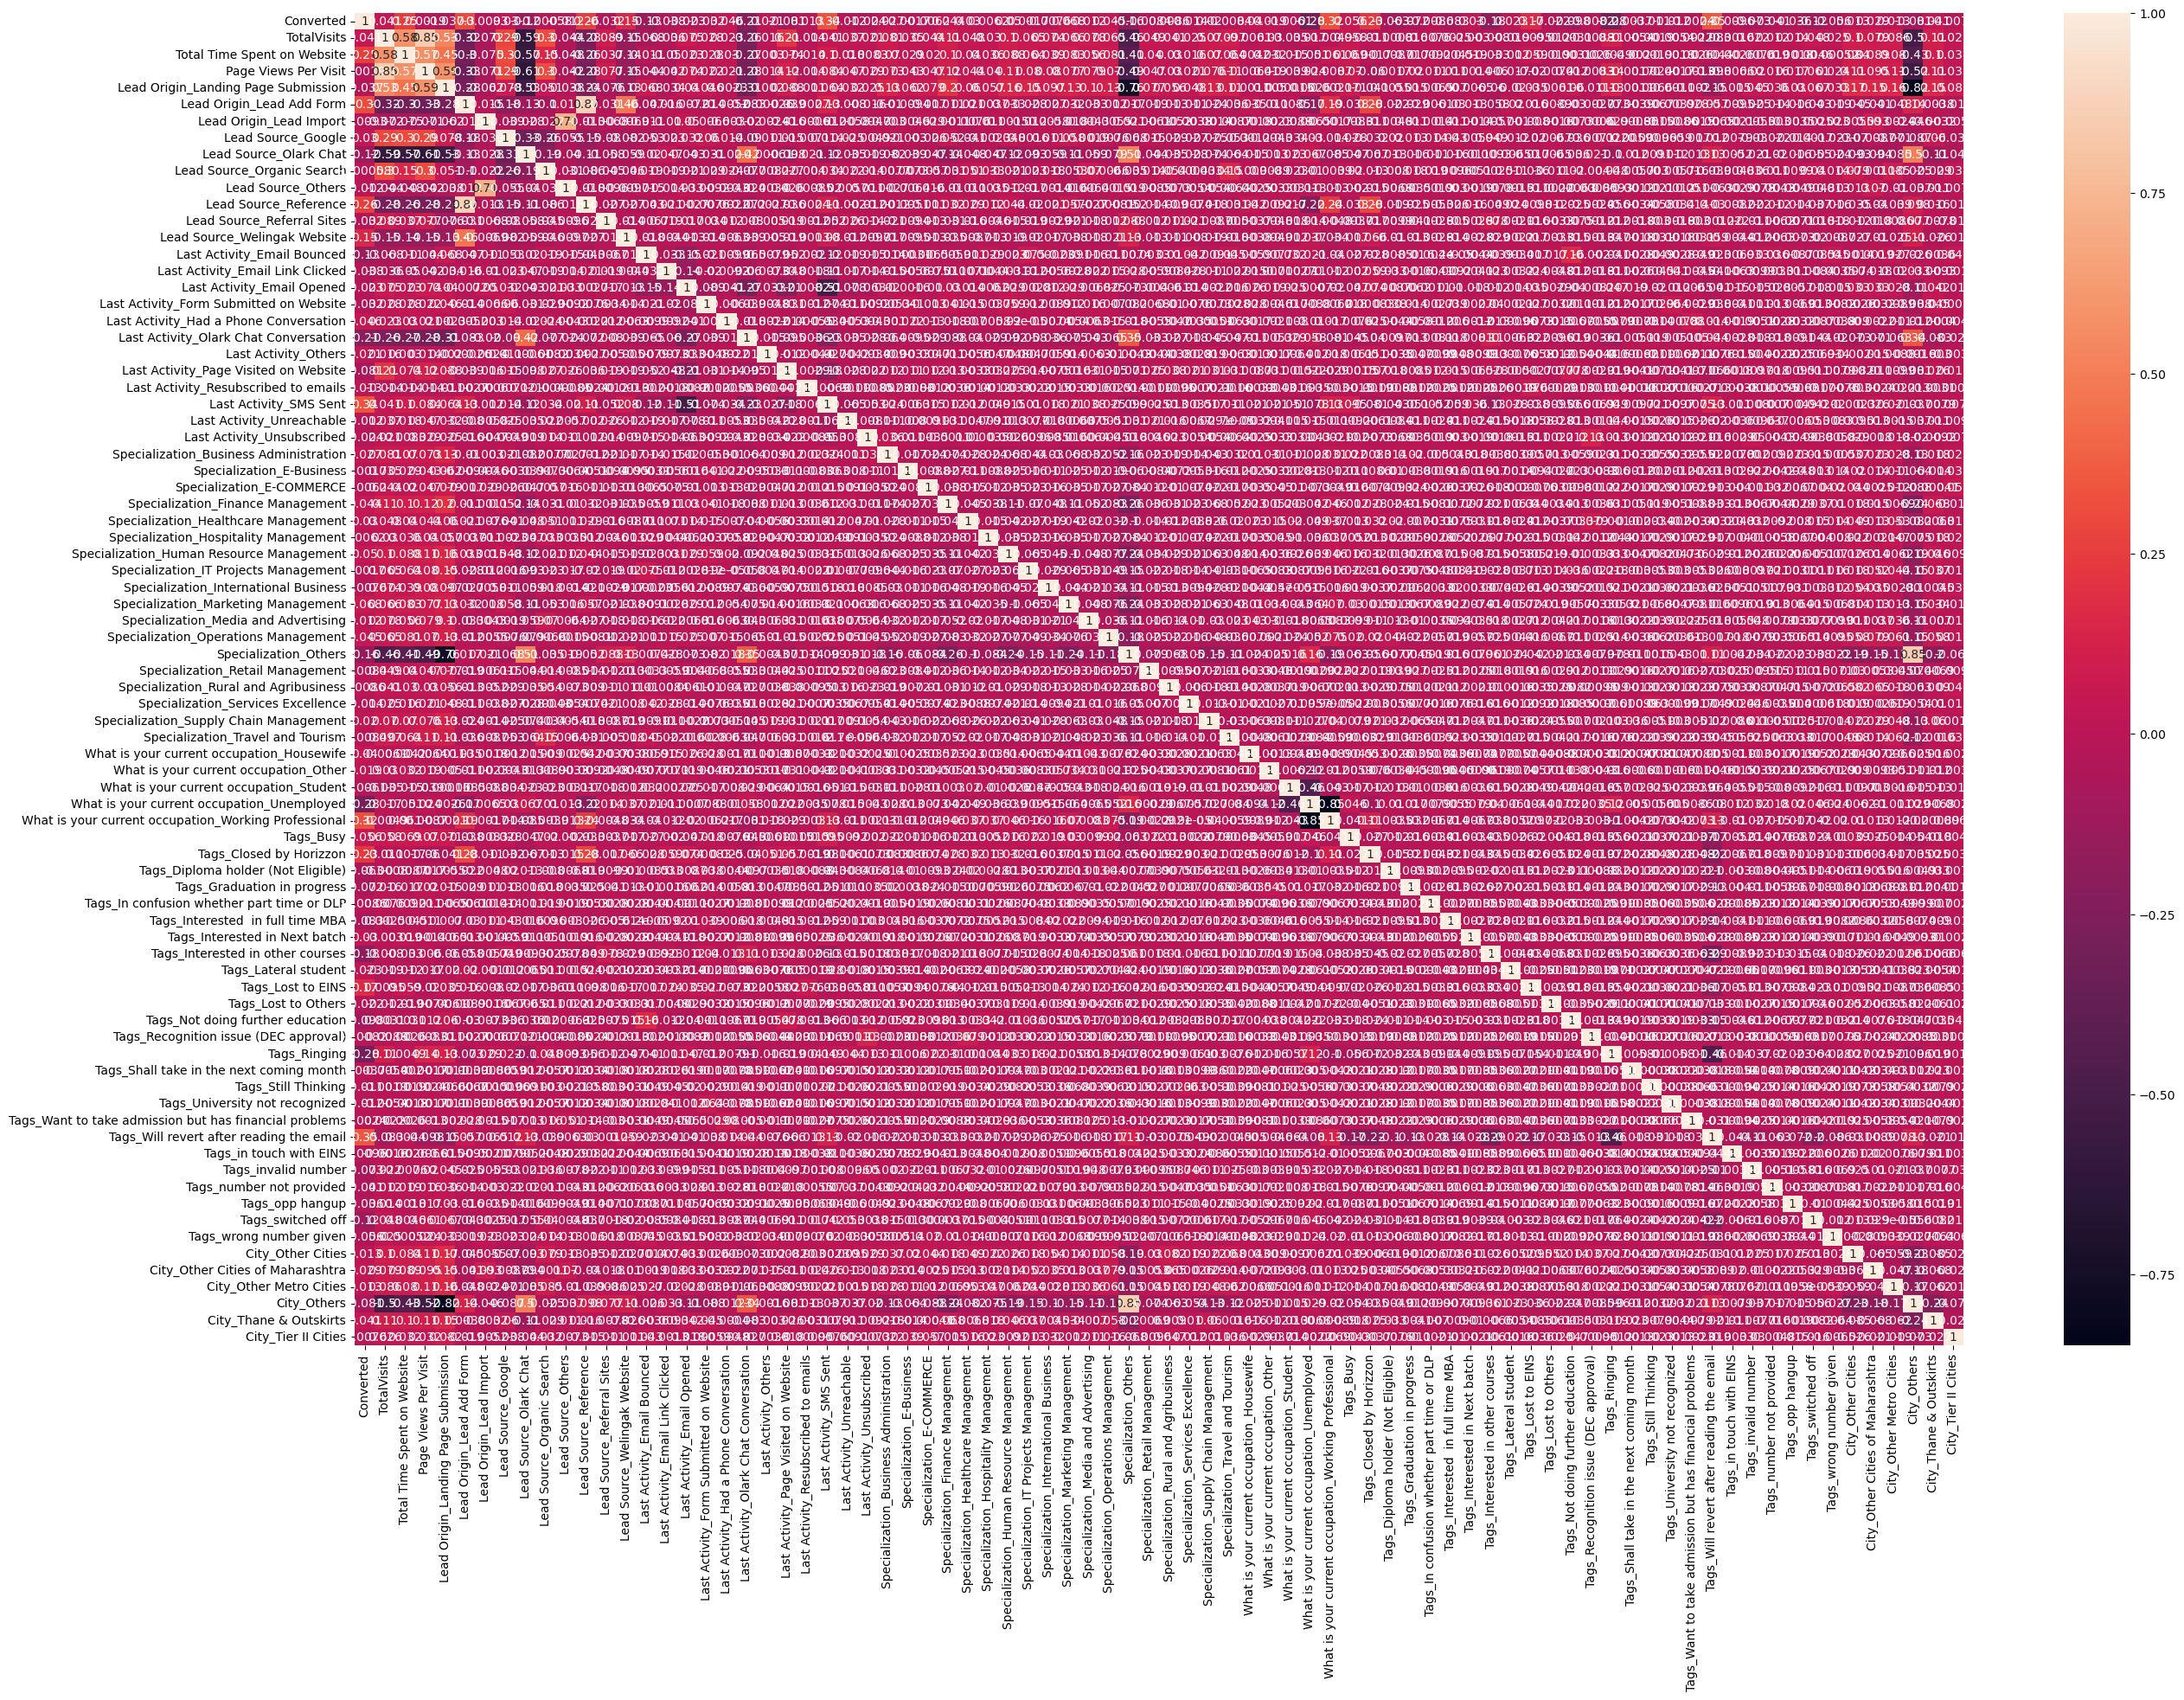

In [66]:
plt.figure(figsize = (30,20))     
sns.heatmap(data.corr(method='spearman'),annot = True)
plt.show()

we couldn't find much which features are highly correlated and to drop thus we will now proceed with building our model with RFE

## Model Building

In [67]:
import statsmodels.api as sm

Feature Selection Using RFE

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [69]:
lr = LogisticRegression()

In [70]:
X_train.head()

Do Not Email Do Not Call  TotalVisits  Total Time Spent on Website  \
3009           No          No    -0.432779                    -0.160255   
1012          Yes          No    -0.432779                    -0.540048   
9226           No          No    -1.150329                    -0.888650   
4750           No          No    -0.432779                     1.643304   
7987           No          No     0.643547                     2.017593   

      Page Views Per Visit Country Last Notable Activity  \
3009             -0.155018   India          Email Opened   
1012             -0.155018   India         Email Bounced   
9226             -1.265540   India              Modified   
4750             -0.155018   India              SMS Sent   
7987              0.122613   India              Modified   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
3009                                    1                          0   
1012                                    1                          0   
9226                                    0                          0   
4750                                    1                          0   
7987                                    1                          0   

      Lead Origin_Lead Import  ...  Tags_number not provided  Tags_opp hangup  \
3009                        0  ...                         0                0   
1012                        0  ...                         0                0   
9226                        0  ...                         0                0   
4750                        0  ...                         0                0   
7987                        0  ...                         0                0   

      Tags_switched off  Tags_wrong number given  City_Other Cities  \
3009                  0                        0                  0   
1012                  0                        0                  0   
9226                  0                        0                  0   
4750                  0                        0                  1   
7987                  0                        0                  0   

      City_Other Cities of Maharashtra  City_Other Metro Cities  City_Others  \
3009                                 0                        0            0   
1012                                 0                        0            0   
9226                                 0                        0            1   
4750                                 0                        0            0   
7987                                 1                        0            0   

      City_Thane & Outskirts  City_Tier II Cities  
3009                       0                    0  
1012                       0                    0  
9226                       0                    0  
4750                       0                    0  
7987                       0                    0  

[5 rows x 83 columns]

In [71]:
X_train = X_train.drop(['Do Not Email','Do Not Call','Country','Last Notable Activity'],1)

In [72]:
X_train.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
3009    -0.432779                    -0.160255             -0.155018   
1012    -0.432779                    -0.540048             -0.155018   
9226    -1.150329                    -0.888650             -1.265540   
4750    -0.432779                     1.643304             -0.155018   
7987     0.643547                     2.017593              0.122613   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
3009                                    1                          0   
1012                                    1                          0   
9226                                    0                          0   
4750                                    1                          0   
7987                                    1                          0   

      Lead Origin_Lead Import  Lead Source_Google  Lead Source_Olark Chat  \
3009                        0                   0                       0   
1012                        0                   0                       0   
9226                        0                   0                       1   
4750                        0                   0                       0   
7987                        0                   0                       0   

      Lead Source_Organic Search  Lead Source_Others  ...  \
3009                           0                   0  ...   
1012                           0                   0  ...   
9226                           0                   0  ...   
4750                           0                   0  ...   
7987                           0                   0  ...   

      Tags_number not provided  Tags_opp hangup  Tags_switched off  \
3009                         0                0                  0   
1012                         0                0                  0   
9226                         0                0                  0   
4750                         0                0                  0   
7987                         0                0                  0   

      Tags_wrong number given  City_Other Cities  \
3009                        0                  0   
1012                        0                  0   
9226                        0                  0   
4750                        0                  1   
7987                        0                  0   

      City_Other Cities of Maharashtra  City_Other Metro Cities  City_Others  \
3009                                 0                        0            0   
1012                                 0                        0            0   
9226                                 0                        0            1   
4750                                 0                        0            0   
7987                                 1                        0            0   

      City_Thane & Outskirts  City_Tier II Cities  
3009                       0                    0  
1012                       0                    0  
9226                       0                    0  
4750                       0                    0  
7987                       0                    0  

[5 rows x 79 columns]

In [73]:
y_train.head()

3009    0
1012    0
9226    0
4750    1
7987    1
Name: Converted, dtype: int64

In [74]:
rfe = RFE(lr, n_features_to_select=15)             
rfe = rfe.fit(X_train, y_train)

In [75]:
rfe.support_

array([False, False, False,  True,  True, False, False, False, False,
       False, False, False,  True,  True, False, False, False,  True,
        True, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False,  True, False,  True,  True, False, False, False, False,
        True, False,  True,  True, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False])

In [76]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 40),
 ('Total Time Spent on Website', False, 2),
 ('Page Views Per Visit', False, 39),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 24),
 ('Lead Source_Google', False, 38),
 ('Lead Source_Olark Chat', False, 11),
 ('Lead Source_Organic Search', False, 37),
 ('Lead Source_Others', False, 60),
 ('Lead Source_Reference', False, 17),
 ('Lead Source_Referral Sites', False, 55),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 31),
 ('Last Activity_Email Opened', False, 16),
 ('Last Activity_Form Submitted on Website', False, 34),
 ('Last Activity_Had a Phone Conversation', True, 1),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', False, 20),
 ('Last Activity_Page Visited on Website', False, 42),
 ('Last Activity_Resubscribed to emails', False, 35),
 ('Last Activity_SMS Sent

In [77]:
cols = X_train.columns[rfe.support_]   
cols

Index(['Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Specialization_Others', 'What is your current occupation_Unemployed',
       'Tags_Busy', 'Tags_Closed by Horizzon', 'Tags_Interested in Next batch',
       'Tags_Lateral student', 'Tags_Lost to EINS',
       'Tags_Will revert after reading the email'],
      dtype='object')

#### Assessing the model with StatsModels

##### 1st model building

In [78]:
X_train_sm = sm.add_constant(X_train[cols])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2064.0
Date:                Sun, 18 Feb 2024   Deviance:                       4128.1
Time:                        17:21:59   Pearson chi2:                 1.11e+04
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4949
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -0.6214      0.242     -2.573      0.010      -1.095      -0.148
Lead Origin_Landing Page Submission           -1.6343      0.148    -11.012      0.000      -1.925      -1.343
Lead Origin_Lead Add Form                      1.4170      0.308      4.598      0.000       0.813       2.021
Lead Source_Welingak Website                   2.4110      0.800      3.014      0.003       0.843       3.979
Last Activity_Email Bounced                   -2.2102      0.389     -5.678      0.000      -2.973      -1.447
Last Activity_Had a Phone Conversation         2.5746      0.907      2.837      0.005       0.796       4.353
Last Activity_Olark Chat Conversation         -1.5508      0.175     -8.852      0.000      -1.894      -1.207
Last Activity_SMS Sent                         1.7661      0.087     20.315      0.000       1.596       1.936
Specialization_Others                         -1.9381      0.150    -12.910      0.000      -2.232      -1.644
What is your current occupation_Unemployed    -2.4526      0.188    -13.068      0.000      -2.820      -2.085
Tags_Busy                                      3.7147      0.253     14.669      0.000       3.218       4.211
Tags_Closed by Horizzon                        8.8475      0.736     12.021      0.000       7.405      10.290
Tags_Interested in Next batch                 24.9100   2.22e+04      0.001      0.999   -4.34e+04    4.35e+04
Tags_Lateral student                          25.2826   3.32e+04      0.001      0.999    -6.5e+04    6.51e+04
Tags_Lost to EINS                              8.6854      0.741     11.724      0.000       7.234      10.137
Tags_Will revert after reading the email       4.1517      0.157     26.373      0.000       3.843       4.460
==============================================================================================================
"""

P value for Tags_Interested in Next batch , Tags_Lateral student are higher which is more than 0.05 so we drop it

In [79]:
cols = cols.drop(['Tags_Interested in Next batch'],1)

##### 2nd model building

In [80]:
X_train_sm = sm.add_constant(X_train[cols])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2072.4
Date:                Sun, 18 Feb 2024   Deviance:                       4144.8
Time:                        17:22:00   Pearson chi2:                 1.08e+04
No. Iterations:                    19   Pseudo R-squ. (CS):             0.4936
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -0.5675      0.239     -2.379      0.017      -1.035      -0.100
Lead Origin_Landing Page Submission           -1.6485      0.148    -11.141      0.000      -1.939      -1.359
Lead Origin_Lead Add Form                      1.4343      0.306      4.685      0.000       0.834       2.034
Lead Source_Welingak Website                   2.3919      0.799      2.993      0.003       0.825       3.958
Last Activity_Email Bounced                   -2.2058      0.389     -5.667      0.000      -2.969      -1.443
Last Activity_Had a Phone Conversation         2.5693      0.902      2.848      0.004       0.801       4.337
Last Activity_Olark Chat Conversation         -1.5512      0.175     -8.857      0.000      -1.895      -1.208
Last Activity_SMS Sent                         1.7765      0.087     20.456      0.000       1.606       1.947
Specialization_Others                         -1.9492      0.150    -13.018      0.000      -2.243      -1.656
What is your current occupation_Unemployed    -2.4345      0.186    -13.082      0.000      -2.799      -2.070
Tags_Busy                                      3.6491      0.251     14.557      0.000       3.158       4.140
Tags_Closed by Horizzon                        8.7877      0.735     11.954      0.000       7.347      10.229
Tags_Lateral student                          23.2067   1.22e+04      0.002      0.998   -2.39e+04    2.39e+04
Tags_Lost to EINS                              8.6261      0.740     11.659      0.000       7.176      10.076
Tags_Will revert after reading the email       4.0892      0.153     26.694      0.000       3.789       4.389
==============================================================================================================
"""

In [81]:
cols = cols.drop(['Tags_Lateral student'],1)

##### 3rd model building

In [82]:
X_train_sm = sm.add_constant(X_train[cols])
logm3= sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2077.4
Date:                Sun, 18 Feb 2024   Deviance:                       4154.9
Time:                        17:22:00   Pearson chi2:                 1.06e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4928
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -0.5542      0.237     -2.335      0.020      -1.019      -0.089
Lead Origin_Landing Page Submission           -1.6404      0.147    -11.121      0.000      -1.929      -1.351
Lead Origin_Lead Add Form                      1.5009      0.308      4.875      0.000       0.897       2.104
Lead Source_Welingak Website                   2.3216      0.800      2.902      0.004       0.754       3.889
Last Activity_Email Bounced                   -2.2040      0.389     -5.665      0.000      -2.967      -1.441
Last Activity_Had a Phone Conversation         2.5677      0.899      2.857      0.004       0.806       4.329
Last Activity_Olark Chat Conversation         -1.5526      0.175     -8.871      0.000      -1.896      -1.210
Last Activity_SMS Sent                         1.7804      0.087     20.516      0.000       1.610       1.951
Specialization_Others                         -1.9341      0.149    -12.955      0.000      -2.227      -1.641
What is your current occupation_Unemployed    -2.4253      0.185    -13.098      0.000      -2.788      -2.062
Tags_Busy                                      3.6155      0.249     14.495      0.000       3.127       4.104
Tags_Closed by Horizzon                        8.7518      0.735     11.912      0.000       7.312      10.192
Tags_Lost to EINS                              8.5934      0.739     11.621      0.000       7.144      10.043
Tags_Will revert after reading the email       4.0544      0.151     26.835      0.000       3.758       4.351
==============================================================================================================
"""

##### VIF verifications

In [83]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#functions for VIF check
def VIFcheck(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [84]:
VIFcheck(X_train[cols])

Features   VIF
2                 Lead Source_Welingak Website  1.34
10                     Tags_Closed by Horizzon  1.19
3                  Last Activity_Email Bounced  1.07
9                                    Tags_Busy  1.07
11                           Tags_Lost to EINS  1.05
4       Last Activity_Had a Phone Conversation  1.01
1                    Lead Origin_Lead Add Form  0.69
5        Last Activity_Olark Chat Conversation  0.32
6                       Last Activity_SMS Sent  0.14
12    Tags_Will revert after reading the email  0.11
0          Lead Origin_Landing Page Submission  0.10
8   What is your current occupation_Unemployed  0.09
7                        Specialization_Others  0.00

Model 3 looks good with significant P value (<0.05) and VIF for all variables.

All parameters have a good value of VIF value. So no need to drop any more variables.

##### Train set predictions

In [85]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.362307
1012    0.092952
9226    0.041762
4750    0.771192
7987    0.996840
1281    0.771192
2880    0.362307
4971    0.918074
7536    0.362307
1248    0.055232
dtype: float64

In [86]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.3623072 , 0.09295217, 0.04176236, 0.77119241, 0.99683987,
       0.77119241, 0.3623072 , 0.91807378, 0.3623072 , 0.05523231])

Creating a dataframe with the actual conversion rates and the predicted probabilities

In [87]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

Converted  Converted_Prob  Lead Number
0          0        0.362307         3009
1          0        0.092952         1012
2          0        0.041762         9226
3          1        0.771192         4750
4          1        0.996840         7987

In [90]:
from sklearn import metrics
#creating ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [91]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

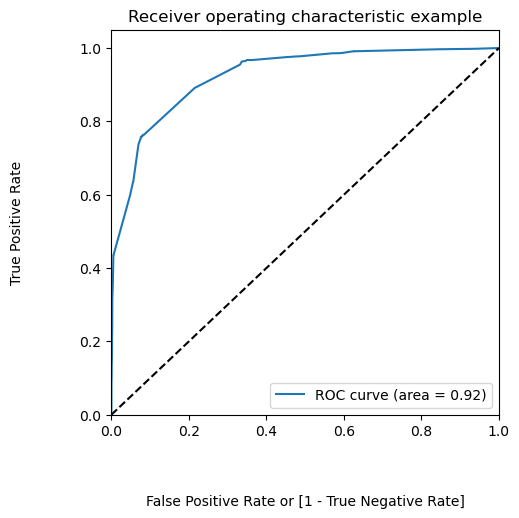

In [92]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

In [93]:
#creating new column 'predicted' with 1 if prob>0.5
y_train_pred_final['Converted_pred']=y_train_pred_final['Converted_Prob'].map(lambda x : 1 if x>0.5 else 0)

In [94]:
y_train_pred_final.head()

Converted  Converted_Prob  Lead Number  Converted_pred
0          0        0.362307         3009               0
1          0        0.092952         1012               0
2          0        0.041762         9226               0
3          1        0.771192         4750               1
4          1        0.996840         7987               1

## Model Evaluation

##### Metrics Calculations

In [95]:
from sklearn import metrics

In [96]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Converted_pred)
print(confusion)

[[3600  305]
 [ 588 1858]]


In [97]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Converted_pred))

0.8593922216973705


In [98]:
TP = confusion[1,1] 
TN = confusion[0,0] 
FP = confusion[1,0] 
FN = confusion[0,1]

In [99]:
print("Sensitivity: ", round((TP / float(TP+FN))*100,2))
print("Specificity: ", round((TN / float(TN+FP))*100,2))
print("False positive rate: ", round((FP/ float(TN+FP))*100,2))
print("Positive predictive: ", round((TP / float(TP+FP))*100,2))
print("Negative predictive: ", round((TN / float(TN+ FN))*100,2))

Sensitivity:  85.9
Specificity:  85.96
False positive rate:  14.04
Positive predictive:  75.96
Negative predictive:  92.19


#### Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [100]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Converted_Prob  Lead Number  Converted_pred  0.0  0.1  0.2  0.3  \
0          0        0.362307         3009               0    1    1    1    1   
1          0        0.092952         1012               0    1    0    0    0   
2          0        0.041762         9226               0    1    0    0    0   
3          1        0.771192         4750               1    1    1    1    1   
4          1        0.996840         7987               1    1    1    1    1   

   0.4  0.5  0.6  0.7  0.8  0.9  
0    0    0    0    0    0    0  
1    0    0    0    0    0    0  
2    0    0    0    0    0    0  
3    1    1    1    1    0    0  
4    1    1    1    1    1    1

Calculate accuracy sensitivity and specificity for various probability cutoffs.

In [101]:
from sklearn.metrics import confusion_matrix


cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1 
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.385136     1.000000     0.000000
0.1          0.1  0.765391     0.967294     0.638924
0.2          0.2  0.777043     0.964023     0.659923
0.3          0.3  0.824280     0.893295     0.781050
0.4          0.4  0.858290     0.759608     0.920102
0.5          0.5  0.859392     0.759608     0.921895
0.6          0.6  0.859077     0.758381     0.922151
0.7          0.7  0.855928     0.737531     0.930090
0.8          0.8  0.779405     0.434996     0.995134
0.9          0.9  0.759723     0.382257     0.996159


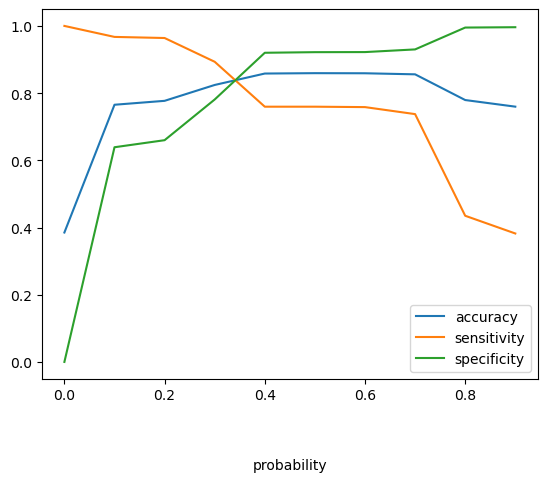

In [102]:
# Plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

From the curve above, 0.37 is the optimum point to take it as a cutoff probability.

In [103]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.3 else 0)
y_train_pred_final.head()

Converted  Converted_Prob  Lead Number  Converted_pred  0.0  0.1  0.2  0.3  \
0          0        0.362307         3009               0    1    1    1    1   
1          0        0.092952         1012               0    1    0    0    0   
2          0        0.041762         9226               0    1    0    0    0   
3          1        0.771192         4750               1    1    1    1    1   
4          1        0.996840         7987               1    1    1    1    1   

   0.4  0.5  0.6  0.7  0.8  0.9  final_predicted  
0    0    0    0    0    0    0                1  
1    0    0    0    0    0    0                0  
2    0    0    0    0    0    0                0  
3    1    1    1    1    0    0                1  
4    1    1    1    1    1    1                1

In [104]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8242796410014172

##### confusion matrix

In [105]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3050,  855],
       [ 261, 2185]], dtype=int64)

In [106]:
TP = confusion2[1,1] 
TN = confusion2[0,0] 
FP = confusion2[1,0] 
FN = confusion2[0,1]

In [107]:
print("Sensitivity_train: ", round((TP / float(TP+FN))*100,2))
print("Specificity_train: ", round((TN / float(TN+FP))*100,2))

Sensitivity_train:  71.88
Specificity_train:  92.12


### Precision and Recall

In [108]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Converted_pred)
print(confusion)

[[3600  305]
 [ 588 1858]]


In [109]:
TP = confusion[1,1] 
TN = confusion[0,0] 
FP = confusion[1,0] 
FN = confusion[0,1]

In [110]:
print("Precision_train: ",round((confusion[1,1]/(confusion[0,1]+confusion[1,1])*100),2))
print("Recall_train: ",round((confusion[1,1]/(confusion[1,0]+confusion[1,1])*100),2))

Precision_train:  85.9
Recall_train:  75.96


#### Precision and recall tradeoff
##### importing precision recall curve from sklearn library for train set

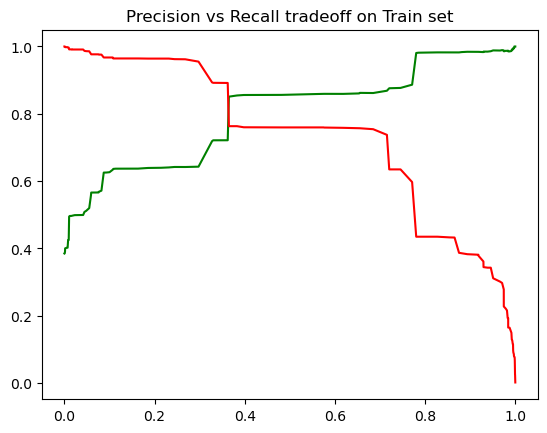

In [111]:
from sklearn.metrics import precision_recall_curve, f1_score

# Creating precision recall curve by creating three points and plotting
p ,r, thresholds=precision_recall_curve(y_train_pred_final.Converted,y_train_pred_final.Converted_Prob)
plt.title('Precision vs Recall tradeoff on Train set')
plt.plot(thresholds, p[:-1], "g-")    # Plotting precision
plt.plot(thresholds, r[:-1], "r-")    # Plotting Recall
plt.show()


In [112]:
Accuracy_train = round(metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.Converted_pred)*100,2)
print('Train set Accuracy:',Accuracy_train)

Train set Accuracy: 85.94


### Prediction on the test dataset

In [113]:
X_test.columns

Index(['Do Not Email', 'Do Not Call', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Country',
       'Last Notable Activity', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Specialization_Business Administration', 'Specializatio

In [114]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]=scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [115]:
X_test = X_test[cols]
X_test.head()

Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
3271                                    0                          0   
1490                                    1                          0   
7936                                    0                          0   
4216                                    0                          1   
3830                                    1                          0   

      Lead Source_Welingak Website  Last Activity_Email Bounced  \
3271                             0                            0   
1490                             0                            0   
7936                             0                            0   
4216                             0                            0   
3830                             0                            0   

      Last Activity_Had a Phone Conversation  \
3271                                       0   
1490                                       0   
7936                                       0   
4216                                       0   
3830                                       0   

      Last Activity_Olark Chat Conversation  Last Activity_SMS Sent  \
3271                                      0                       0   
1490                                      0                       0   
7936                                      0                       0   
4216                                      0                       0   
3830                                      0                       0   

      Specialization_Others  What is your current occupation_Unemployed  \
3271                      1                                           1   
1490                      0                                           0   
7936                      1                                           1   
4216                      0                                           0   
3830                      0                                           1   

      Tags_Busy  Tags_Closed by Horizzon  Tags_Lost to EINS  \
3271          0                        0                  0   
1490          0                        0                  0   
7936          0                        0                  0   
4216          0                        1                  0   
3830          0                        0                  0   

      Tags_Will revert after reading the email  
3271                                         1  
1490                                         1  
7936                                         1  
4216                                         0  
3830                                         1

In [116]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

3271    0.297533
1490    0.865289
7936    0.297533
4216    0.999939
3830    0.362307
1800    0.865289
6507    0.055232
4821    0.009758
4223    0.918507
4714    0.715316
dtype: float64

In [117]:
# Converting y_pred to a dataframe which is an array
y_test_pred_1 = pd.DataFrame(y_test_pred)

In [118]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df['Lead Number'] = y_test_df.index

In [119]:
# Removing index for both dataframes to append them side by side 
y_test_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [120]:
# Appending y_test_df and y_pred_1
y_test_pred_final = pd.concat([y_test_df, y_test_pred_1],axis=1)

In [121]:
y_test_pred_final= y_test_pred_final.rename(columns={ 0 : 'Converted_Prob'})
y_test_pred_final.head()

Converted  Lead Number  Converted_Prob
0          0         3271        0.297533
1          1         1490        0.865289
2          0         7936        0.297533
3          1         4216        0.999939
4          0         3830        0.362307

In [122]:
y_test_pred_final['final_predicted'] = y_test_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.37 else 0)

In [123]:
y_test_pred_final.head()

Converted  Lead Number  Converted_Prob  final_predicted
0          0         3271        0.297533                0
1          1         1490        0.865289                1
2          0         7936        0.297533                0
3          1         4216        0.999939                1
4          0         3830        0.362307                0

In [124]:
confusion_test= metrics.confusion_matrix(y_test_pred_final.Converted, y_test_pred_final.final_predicted )
confusion_test

array([[1585,  149],
       [ 265,  724]], dtype=int64)

In [125]:
TP = confusion_test[1,1] 
TN = confusion_test[0,0]
FP = confusion_test[1,0] 
FN = confusion_test[0,1] 

In [126]:
print("Specificity_test: ",  round((TN / float(TN+FP))*100,2))
print("Precision_test: ", round((TP/float(FP+TP))*100,2))
print("Recall_test: ", round((TP/float(FN + TP))*100,2))

Specificity_test:  85.68
Precision_test:  73.21
Recall_test:  82.93


In [127]:
Accuracy_test = round(metrics.accuracy_score(y_test_pred_final.Converted,y_test_pred_final.final_predicted)*100,2)
print('Test set Accuracy:',Accuracy_test)

Test set Accuracy: 84.8


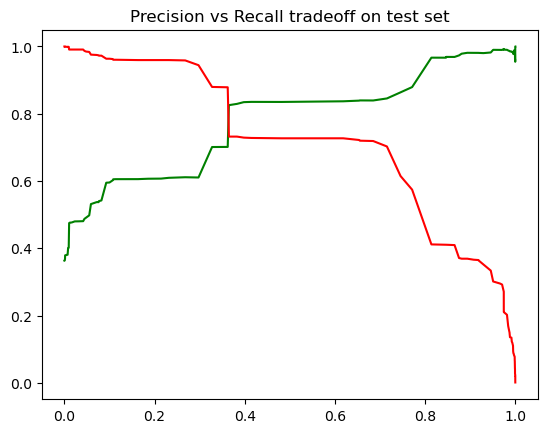

In [128]:
p ,r, thresholds=precision_recall_curve(y_test_pred_final.Converted, y_test_pred_final.Converted_Prob)
plt.title('Precision vs Recall tradeoff on test set')
plt.plot(thresholds, p[:-1], "g-")    
plt.plot(thresholds, r[:-1], "r-")   
plt.show()

The F1 score states the equilibrium between the precision and the recall.

In [129]:
print('F1_Score: ',f1_score(y_test_pred_final.Converted, y_test_pred_final.final_predicted)*100)

F1_Score:  77.76584317937701


Lead Score assignment to the Predicted values based on Lead Number

In [130]:
#create new columns for lead score and number
y_test_pred_final['Lead Score']=y_test_pred_final['Converted_Prob'].apply(lambda x:round(x*100))

y_test_pred_final.head(20)

Converted  Lead Number  Converted_Prob  final_predicted  Lead Score
0           0         3271        0.297533                0          30
1           1         1490        0.865289                1          87
2           0         7936        0.297533                0          30
3           1         4216        0.999939                1         100
4           0         3830        0.362307                0          36
5           1         1800        0.865289                1          87
6           0         6507        0.055232                0           6
7           0         4821        0.009758                0           1
8           1         4223        0.918507                1          92
9           0         4714        0.715316                1          72
10          1         3977        0.715316                1          72
11          0         4209        0.082288                0           8
12          0         2320        0.007293                0           1
13          0         3744        0.001553                0           0
14          1         2570        0.945598                1          95
15          1          985        0.297533                0          30
16          1         1946        0.945598                1          95
17          0         7813        0.009758                0           1
18          0         7031        0.082288                0           8
19          0         2044        0.297533                0          30

Lead score 100 means that person probability of conversion is high, so sales team can focus more on that person.

### Conclusion

- Logistic regression here is used to find the probability of conversion of customer.
- Model is looking good with significant P , VIF and Coefficient values.
- Final model is built with 13 features.
- Optimum cut off is 0.37 so any lead greater than this value is probability of converting is predicted as protential lead and less than this probability of cutomer who will not convert.
- The top 5 variables in final model are Tags_close by horizon, Tags_will revert after reading the email,
Lead source_Welingak website, Last activity_had a phone conversation, Last ativity_SMS sent.
- Sensitivity value is good this means the prediction of lead conversion is true

Sensitivity_train:  71.88% ,
Specificity_train:  92.12% ,
Train set Accuracy: 85.94% .

Recall_test:  82.93% ,
Specificity_test:  85.68% ,
Test set Accuracy: 84.8% .